In [5]:
import pandas as pd
import numpy as np
import random
from IPython.display import display

# Configuration with more realistic distributions
num_samples = 500
locations = ['hospital', 'clinic', 'patient_home', 'nursing_home']
time_zones = ['EST', 'CST', 'MST', 'PST', 'AKST', 'HST']
genders = ['M', 'F', 'Other']
event_types = [
    'allergic_reaction', 'cardiac_event', 'respiratory_distress',
    'medication_error', 'stroke_symptoms', 'overdose', 'hypoglycemia',
    'sepsis_symptoms', 'none'
]

def generate_dataset(num_samples, is_training=True):
    data = []
    for i in range(num_samples):
        # Generate more realistic call patterns
        is_emergency = random.random() < 0.25  # 25% are emergencies
        is_urgent = is_emergency or (random.random() < 0.15)  # 15% additional urgent
        
        # Duration and speech rate based on urgency
        if is_emergency:
            duration = max(20, min(90, np.random.normal(45, 15)))
            speech_rate = max(180, min(280, np.random.normal(220, 30)))
        elif is_urgent:
            duration = max(45, min(120, np.random.normal(80, 20)))
            speech_rate = max(150, min(220, np.random.normal(190, 25)))
        else:
            duration = max(90, min(600, np.random.normal(240, 90)))
            speech_rate = max(80, min(160, np.random.normal(120, 20)))
        
        # Generate more nuanced features
        row = {
            'call_id': (1000 + i) if is_training else (2000 + i),
            'sender_id': f"PAT_{random.randint(10000, 99999)}",
            'receiver_id': random.choice([f"NUR_{random.randint(5000, 5999)}", 
                                        f"MD_{random.randint(1000, 1999)}",
                                        f"AGENT_{random.randint(7000, 7999)}"]),
            'audio_path': f"audio/{'train' if is_training else 'test'}/call_{i}.wav",
            'emergency_terms': int(is_emergency),
            'uncertainty_terms': int(random.random() < 0.3),  # 30% have uncertainty
            'urgency_terms': int(is_urgent),
            'reaction_terms': int(random.random() < 0.25),  # 25% report reactions
            'pain_terms': int(random.random() < 0.2),  # 20% report pain
            'gender': random.choices(genders, weights=[0.45, 0.45, 0.1], k=1)[0],
            'age_group': random.choice(['18-25', '26-40', '41-65', '65+']),
            'time_zone': random.choice(time_zones),
            'location': random.choices(locations, weights=[0.4, 0.3, 0.2, 0.1], k=1)[0],
            'duration_sec': int(duration),
            'speech_rate_wpm': int(speech_rate),
            'call_time': pd.to_datetime('2023-01-01') + pd.to_timedelta(np.random.uniform(0, 365)),  # Random datetime in 2023
            'background_noise': random.choice(['low', 'medium', 'high'])
        }
        
        if is_training:
            # More realistic event distribution
            if is_emergency:
                event_type = random.choices(event_types[:-1], weights=[0.2, 0.15, 0.15, 0.1, 0.1, 0.1, 0.1, 0.1], k=1)[0]
                event_occurred = 1
            elif row['reaction_terms']:
                event_type = random.choice(['allergic_reaction', 'medication_error', 'overdose'])
                event_occurred = 1
            else:
                event_occurred = int(random.random() < 0.02)  # 2% false positives
                event_type = random.choice(event_types[:-1]) if event_occurred else 'none'
            
            row.update({
                'adverse_event': event_occurred,
                'event_type': event_type,
                'severity': random.randint(1, 5) if event_occurred else 0
            })
        
        data.append(row)
    
    df = pd.DataFrame(data)
    if is_training:
        df['call_time'] = pd.to_datetime(df['call_time'])
    return df

# Generate datasets
train_df = generate_dataset(500, is_training=True)
test_df = generate_dataset(500, is_training=False)

# Save to CSV
train_df.to_csv('medical_emergency_train.csv', index=False)
test_df.to_csv('medical_emergency_test.csv', index=False)

# Create sample audio directory structure (optional)
import os
os.makedirs('audio/train', exist_ok=True)
os.makedirs('audio/test', exist_ok=True)

print("Datasets generated successfully!")
display(train_df.head(3))
display(test_df.head(3))

Datasets generated successfully!


,call_id,sender_id,receiver_id,audio_path,emergency_terms,uncertainty_terms,urgency_terms,reaction_terms,pain_terms,gender,age_group,time_zone,location,duration_sec,speech_rate_wpm,call_time,background_noise,adverse_event,event_type,severity
0,1000,PAT_79839,MD_1801,audio/train/call_0.wav,0,0,0,0,0,M,41-65,AKST,clinic,259,93,2023-01-01 00:00:00.000000335,medium,0,none,0
1,1001,PAT_52337,MD_1669,audio/train/call_1.wav,0,0,0,1,1,M,26-40,PST,patient_home,322,108,2023-01-01 00:00:00.000000005,low,1,overdose,3
2,1002,PAT_56744,NUR_5515,audio/train/call_2.wav,1,0,1,0,0,F,65+,PST,hospital,30,180,2023-01-01 00:00:00.000000118,high,1,hypoglycemia,4


,call_id,sender_id,receiver_id,audio_path,emergency_terms,uncertainty_terms,urgency_terms,reaction_terms,pain_terms,gender,age_group,time_zone,location,duration_sec,speech_rate_wpm,call_time,background_noise
0,2000,PAT_40414,NUR_5478,audio/test/call_0.wav,0,0,1,1,0,F,26-40,CST,clinic,59,209,2023-01-01 00:00:00.000000014,medium
1,2001,PAT_90338,AGENT_7171,audio/test/call_1.wav,0,0,0,1,0,M,65+,CST,clinic,175,105,2023-01-01 00:00:00.000000038,medium
2,2002,PAT_33557,MD_1911,audio/test/call_2.wav,0,0,0,0,0,Other,18-25,EST,clinic,204,134,2023-01-01 00:00:00.000000362,low


In [1]:
pip install pandas numpy gtts pydub faker pyttsx3 wordcloud

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd

# Read the CSV files
train_df = pd.read_csv('medical_emergency_train.csv')
test_df = pd.read_csv('medical_emergency_test.csv')

# Display basic info
print("Training Data Shape:", train_df.shape)
print("Testing Data Shape:", test_df.shape)
train_df.head()

Training Data Shape: (500, 20)
Testing Data Shape: (500, 17)


,call_id,sender_id,receiver_id,audio_path,emergency_terms,uncertainty_terms,urgency_terms,reaction_terms,pain_terms,gender,age_group,time_zone,location,duration_sec,speech_rate_wpm,call_time,background_noise,adverse_event,event_type,severity
0,1000,PAT_79839,MD_1801,audio/train/call_0.wav,0,0,0,0,0,M,41-65,AKST,clinic,259,93,2023-01-01 00:00:00.000000335,medium,0,none,0
1,1001,PAT_52337,MD_1669,audio/train/call_1.wav,0,0,0,1,1,M,26-40,PST,patient_home,322,108,2023-01-01 00:00:00.000000005,low,1,overdose,3
2,1002,PAT_56744,NUR_5515,audio/train/call_2.wav,1,0,1,0,0,F,65+,PST,hospital,30,180,2023-01-01 00:00:00.000000118,high,1,hypoglycemia,4
3,1003,PAT_58720,NUR_5947,audio/train/call_3.wav,1,0,1,1,0,Other,65+,EST,clinic,40,186,2023-01-01 00:00:00.000000129,high,1,medication_error,2
4,1004,PAT_84474,MD_1433,audio/train/call_4.wav,0,1,0,0,0,M,41-65,HST,hospital,277,132,2023-01-01 00:00:00.000000136,medium,0,none,0


In [7]:
# Specify data types for better memory management
dtype_mapping = {
    'call_id': 'int32',
    'emergency_terms': 'int8',
    'duration_sec': 'int16',
    'speech_rate_wpm': 'int16'
}

train_df = pd.read_csv('medical_emergency_train.csv', dtype=dtype_mapping, parse_dates=['call_time'])
test_df = pd.read_csv('medical_emergency_test.csv', dtype=dtype_mapping)

In [8]:
def load_with_analysis(filepath):
    df = pd.read_csv(filepath)
    print(f"\n=== {filepath} ===")
    print("1. Missing Values:")
    display(df.isnull().sum())
    
    print("\n2. Basic Statistics:")
    display(df.describe(include='all'))
    
    print("\n3. Data Types:")
    display(df.dtypes)
    
    return df

train_df = load_with_analysis('medical_emergency_train.csv')
test_df = load_with_analysis('medical_emergency_test.csv')


=== medical_emergency_train.csv ===
1. Missing Values:


call_id              0
sender_id            0
receiver_id          0
audio_path           0
emergency_terms      0
uncertainty_terms    0
urgency_terms        0
reaction_terms       0
pain_terms           0
gender               0
age_group            0
time_zone            0
location             0
duration_sec         0
speech_rate_wpm      0
call_time            0
background_noise     0
adverse_event        0
event_type           0
severity             0
dtype: int64


2. Basic Statistics:


,call_id,sender_id,receiver_id,audio_path,emergency_terms,uncertainty_terms,urgency_terms,reaction_terms,pain_terms,gender,age_group,time_zone,location,duration_sec,speech_rate_wpm,call_time,background_noise,adverse_event,event_type,severity
count,500.000000,500,500,500,500.000000,500.000000,500.000000,500.000000,500.000000,500,500,500,500,500.000000,500.000000,500,500,500.000000,500,500.000000
unique,NaN,499,463,500,NaN,NaN,NaN,NaN,NaN,3,4,6,4,NaN,NaN,278,3,NaN,9,NaN
top,NaN,PAT_11609,AGENT_7104,audio/train/call_0.wav,NaN,NaN,NaN,NaN,NaN,M,18-25,HST,hospital,NaN,NaN,2023-01-01 00:00:00.000000303,medium,NaN,none,NaN
freq,NaN,2,3,1,NaN,NaN,NaN,NaN,NaN,229,137,95,210,NaN,NaN,8,170,NaN,296,NaN
mean,1249.500000,NaN,NaN,NaN,0.228000,0.290000,0.348000,0.240000,0.176000,NaN,NaN,NaN,NaN,179.342000,150.494000,NaN,NaN,0.408000,NaN,1.260000
std,144.481833,NaN,NaN,NaN,0.419963,0.454216,0.476813,0.427511,0.381202,NaN,NaN,NaN,NaN,113.968358,47.135267,NaN,NaN,0.491955,NaN,1.781783
min,1000.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,20.000000,80.000000,NaN,NaN,0.000000,NaN,0.000000
25%,1124.750000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,67.750000,112.000000,NaN,NaN,0.000000,NaN,0.000000
50%,1249.500000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,173.000000,136.000000,NaN,NaN,0.000000,NaN,0.000000
75%,1374.250000,NaN,NaN,NaN,0.000000,1.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,276.000000,190.250000,NaN,NaN,1.000000,NaN,2.000000



3. Data Types:


call_id               int64
sender_id            object
receiver_id          object
audio_path           object
emergency_terms       int64
uncertainty_terms     int64
urgency_terms         int64
reaction_terms        int64
pain_terms            int64
gender               object
age_group            object
time_zone            object
location             object
duration_sec          int64
speech_rate_wpm       int64
call_time            object
background_noise     object
adverse_event         int64
event_type           object
severity              int64
dtype: object


=== medical_emergency_test.csv ===
1. Missing Values:


call_id              0
sender_id            0
receiver_id          0
audio_path           0
emergency_terms      0
uncertainty_terms    0
urgency_terms        0
reaction_terms       0
pain_terms           0
gender               0
age_group            0
time_zone            0
location             0
duration_sec         0
speech_rate_wpm      0
call_time            0
background_noise     0
dtype: int64


2. Basic Statistics:


,call_id,sender_id,receiver_id,audio_path,emergency_terms,uncertainty_terms,urgency_terms,reaction_terms,pain_terms,gender,age_group,time_zone,location,duration_sec,speech_rate_wpm,call_time,background_noise
count,500.000000,500,500,500,500.000000,500.000000,500.000000,500.000000,500.000000,500,500,500,500,500.000000,500.00000,500,500
unique,NaN,498,458,500,NaN,NaN,NaN,NaN,NaN,3,4,6,4,NaN,NaN,273,3
top,NaN,PAT_89432,MD_1477,audio/test/call_0.wav,NaN,NaN,NaN,NaN,NaN,M,18-25,AKST,hospital,NaN,NaN,2023-01-01 00:00:00.000000136,medium
freq,NaN,2,3,1,NaN,NaN,NaN,NaN,NaN,249,136,94,178,NaN,NaN,8,176
mean,2249.500000,NaN,NaN,NaN,0.274000,0.314000,0.380000,0.252000,0.210000,NaN,NaN,NaN,NaN,172.418000,154.38000,NaN,NaN
std,144.481833,NaN,NaN,NaN,0.446456,0.464581,0.485873,0.434596,0.407716,NaN,NaN,NaN,NaN,115.653702,52.14812,NaN,NaN
min,2000.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,20.000000,80.00000,NaN,NaN
25%,2124.750000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,58.750000,115.00000,NaN,NaN
50%,2249.500000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,161.500000,137.00000,NaN,NaN
75%,2374.250000,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,268.250000,195.25000,NaN,NaN



3. Data Types:


call_id               int64
sender_id            object
receiver_id          object
audio_path           object
emergency_terms       int64
uncertainty_terms     int64
urgency_terms         int64
reaction_terms        int64
pain_terms            int64
gender               object
age_group            object
time_zone            object
location             object
duration_sec          int64
speech_rate_wpm       int64
call_time            object
background_noise     object
dtype: object

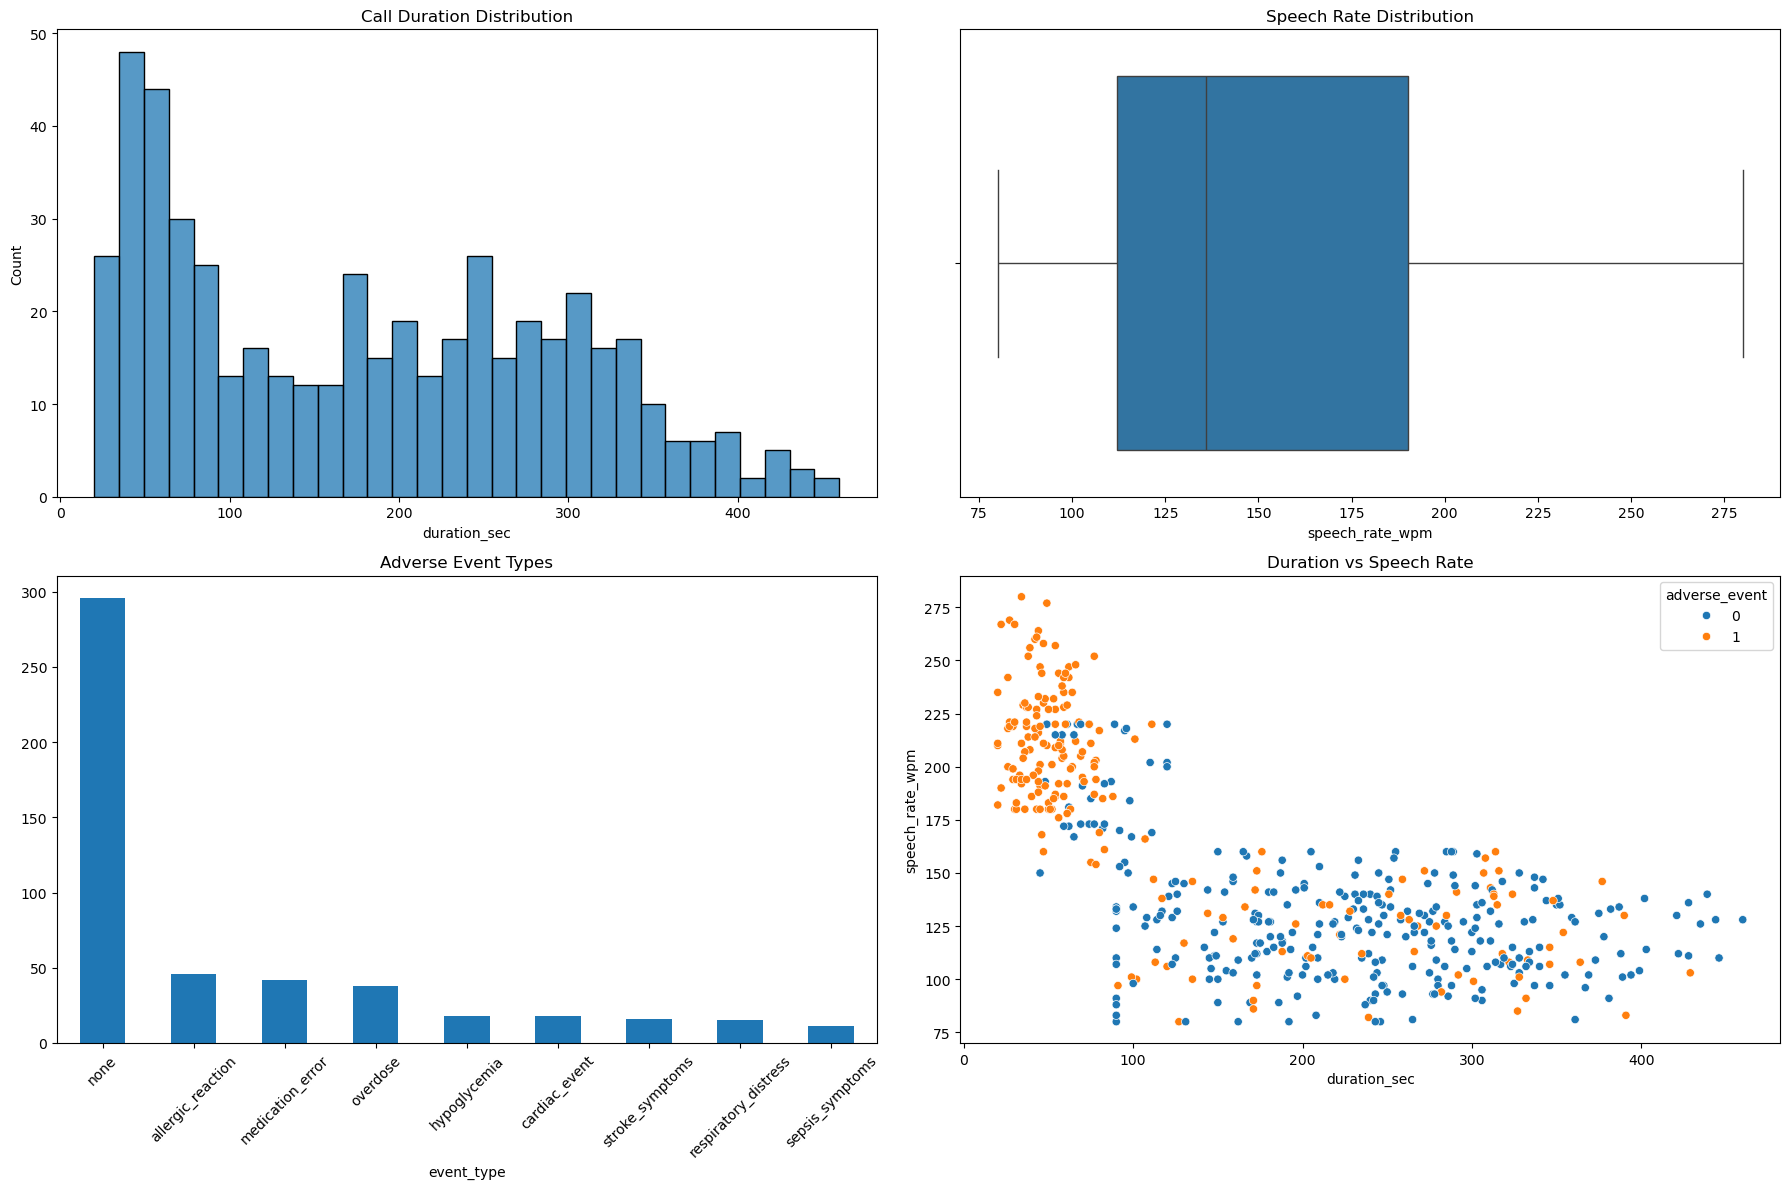

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up visualization
def plot_distributions(df):
    plt.figure(figsize=(18, 12))
    
    # Numeric features
    plt.subplot(2, 2, 1)
    sns.histplot(df['duration_sec'], bins=30)
    plt.title('Call Duration Distribution')
    
    plt.subplot(2, 2, 2)
    sns.boxplot(x=df['speech_rate_wpm'])
    plt.title('Speech Rate Distribution')
    
    # Categorical features
    plt.subplot(2, 2, 3)
    df['event_type'].value_counts().plot(kind='bar')
    plt.title('Adverse Event Types')
    plt.xticks(rotation=45)
    
    plt.subplot(2, 2, 4)
    sns.scatterplot(x='duration_sec', y='speech_rate_wpm', hue='adverse_event', data=df)
    plt.title('Duration vs Speech Rate')
    
    plt.tight_layout()
    plt.show()

plot_distributions(train_df)

In [10]:
import pandas as pd
import requests

# Read your dataset
df = pd.read_csv('medical_emergency_test.csv')  # or use your actual file path

# Function to check link accessibility
def check_audio_link(url):
    try:
        response = requests.head(url, timeout=5)
        return response.status_code == 200
    except:
        return False

# Apply to your audio_path column
df['audio_accessible'] = df['audio_path'].apply(check_audio_link)

# Show results
print(f"Accessible: {df['audio_accessible'].sum()}/{len(df)}")
df[['audio_path', 'audio_accessible']].head()

Accessible: 0/500


,audio_path,audio_accessible
0,audio/test/call_0.wav,False
1,audio/test/call_1.wav,False
2,audio/test/call_2.wav,False
3,audio/test/call_3.wav,False
4,audio/test/call_4.wav,False


In [11]:
from urllib.request import urlopen
from urllib.error import URLError, HTTPError
import os

def verify_audio_link(row):
    path = row['audio_path']
    
    # if path exists locally?
    if os.path.exists(path):
        return "Local file exists"
    
    # if it's a URL?
    if path.startswith(('http://', 'https://')):
        try:
            with urlopen(path, timeout=5) as response:
                if response.getcode() == 200:
                    return "URL accessible"
        except HTTPError as e:
            return f"HTTP Error: {e.code}"
        except URLError as e:
            return f"URL Error: {e.reason}"
        except:
            return "Unknown error"
    
    return "Invalid path format"

# Applying verification
df['audio_status'] = df.apply(verify_audio_link, axis=1)

# Display results
status_counts = df['audio_status'].value_counts()
print("Audio Link Status Summary:")
print(status_counts)

# problematic links
if any(status_counts.index != "Local file exists"):
    print("\nProblematic Links:")
    display(df[df['audio_status'] != "Local file exists"][['call_id', 'audio_path', 'audio_status']])

Audio Link Status Summary:
audio_status
Invalid path format    500
Name: count, dtype: int64

Problematic Links:


,call_id,audio_path,audio_status
0,2000,audio/test/call_0.wav,Invalid path format
1,2001,audio/test/call_1.wav,Invalid path format
2,2002,audio/test/call_2.wav,Invalid path format
3,2003,audio/test/call_3.wav,Invalid path format
4,2004,audio/test/call_4.wav,Invalid path format
...,...,...,...
495,2495,audio/test/call_495.wav,Invalid path format
496,2496,audio/test/call_496.wav,Invalid path format
497,2497,audio/test/call_497.wav,Invalid path format
498,2498,audio/test/call_498.wav,Invalid path format


In [31]:
!pip install openai-whisper torch scispacy spacy
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacyreleases/en_core_sci_md-0.5.1.tar.gz

     ---------------------------------------- 0.0/800.5 kB ? eta -:--:--
     ------------------------ ------------- 524.3/800.5 kB 2.1 MB/s eta 0:00:01
     -------------------------------------- 800.5/800.5 kB 2.5 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
   ---------------------------------------- 0.0/212.5 MB ? eta -:--:--
   ---------------------------------------- 0.5/212.5 MB 2.4 MB/s eta 0:01:29
   ---------------------------------------- 1.0/212.5 MB 2.8 MB/s eta 0:01:16
   ---------------------------------------- 1.6/212.5 MB 2.9 MB/s eta 0:01:13
   ---------------------------------------- 2.4/212.5 MB 2.9 MB/s eta 

  ERROR: HTTP error 404 while getting https://s3-us-west-2.amazonaws.com/ai2-s2-scispacyreleases/en_core_sci_md-0.5.1.tar.gz
ERROR: Could not install requirement https://s3-us-west-2.amazonaws.com/ai2-s2-scispacyreleases/en_core_sci_md-0.5.1.tar.gz because of HTTP error 404 Client Error: Not Found for url: https://s3-us-west-2.amazonaws.com/ai2-s2-scispacyreleases/en_core_sci_md-0.5.1.tar.gz for URL https://s3-us-west-2.amazonaws.com/ai2-s2-scispacyreleases/en_core_sci_md-0.5.1.tar.gz


In [19]:
!pip install gTTS

C:\Users\acer\AppData\Local\Temp\ipykernel_251168\3016833306.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=keyword_freq.values, y=keyword_freq.index, palette='Blues_d')


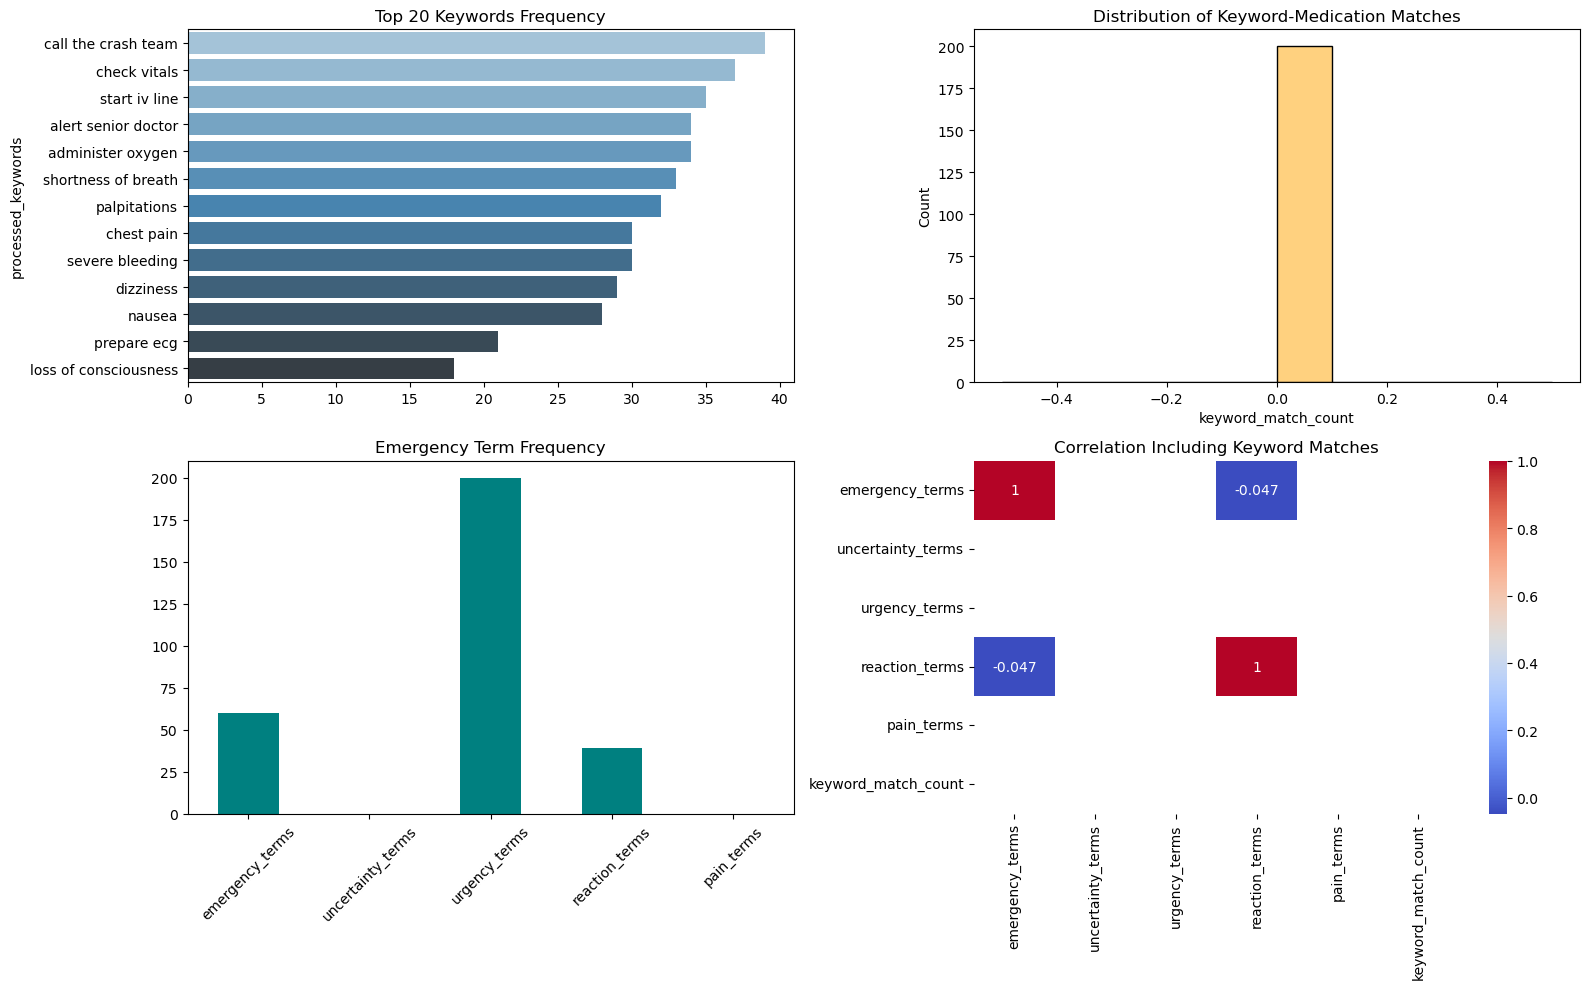

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('complete_medical_dataset.csv')

# Medical Term Dictionaries
MEDICATION_TERMS = {
    'analgesics': ['paracetamol', 'ibuprofen', 'aspirin', 'naproxen'],
    'antibiotics': ['amoxicillin', 'azithromycin', 'doxycycline'],
    'antihypertensives': ['lisinopril', 'amlodipine', 'metoprolol'],
    'insulins': ['glargine', 'lispro', 'aspart']
}

EMERGENCY_TERMS = {
    'emergency_terms': ['pain', 'bleeding', 'unconscious', 'collapse'],
    'uncertainty_terms': ['maybe', 'perhaps', 'unsure', 'possibly'],
    'urgency_terms': ['now', 'immediately', 'urgent', 'stat'],
    'reaction_terms': ['allergy', 'swelling', 'rash', 'anaphylaxis'],
    'pain_terms': ['hurts', 'aching', 'sharp pain', 'discomfort']
}

# 1. Extract Medical Terms from Transcripts
def extract_medical_terms(transcript):
    results = {
        'medication_classes': [],
        'specific_medications': [],
        'emergency_flags': {category: 0 for category in EMERGENCY_TERMS}
    }

    transcript_lower = transcript.lower()

    for class_name, med_list in MEDICATION_TERMS.items():
        for med in med_list:
            if med in transcript_lower:
                results['medication_classes'].append(class_name)
                results['specific_medications'].append(med)

    for category, terms in EMERGENCY_TERMS.items():
        results['emergency_flags'][category] = sum(term in transcript_lower for term in terms)

    return pd.Series({
        **results['emergency_flags'],
        'medication_classes': list(set(results['medication_classes'])),
        'specific_medications': list(set(results['specific_medications']))
    })

# Apply term extraction
term_analysis = df['transcript'].apply(extract_medical_terms)
df = pd.concat([df, term_analysis], axis=1)

# 2. Analyze Provided Keywords
def process_keywords(keywords):
    if pd.isna(keywords):
        return []
    return [kw.strip().lower() for kw in keywords.split(',')]

df['processed_keywords'] = df['keywords'].apply(process_keywords)
all_keywords = df['processed_keywords'].explode()
keyword_freq = all_keywords.value_counts().head(20)

# 3. Compare Extracted Terms with Provided Keywords
def match_keywords_with_extracted(row):
    extracted_terms = set(row['specific_medications'])
    keywords_set = set(row['processed_keywords'])
    return len(extracted_terms.intersection(keywords_set))

df['keyword_match_count'] = df.apply(match_keywords_with_extracted, axis=1)

# 4. Visualization
plt.figure(figsize=(16, 10))

# Top Keywords
plt.subplot(2, 2, 1)
sns.barplot(x=keyword_freq.values, y=keyword_freq.index, palette='Blues_d')
plt.title('Top 20 Keywords Frequency')

# Keyword Match Count
plt.subplot(2, 2, 2)
sns.histplot(df['keyword_match_count'], bins=10, kde=True, color='orange')
plt.title('Distribution of Keyword-Medication Matches')

# Emergency Term Counts
plt.subplot(2, 2, 3)
emergency_term_counts = df[[*EMERGENCY_TERMS.keys()]].sum()
emergency_term_counts.plot(kind='bar', color='teal')
plt.title('Emergency Term Frequency')
plt.xticks(rotation=45)

# Correlation Matrix (including keyword match count)
plt.subplot(2, 2, 4)
corr_matrix = df[[*EMERGENCY_TERMS.keys(), 'keyword_match_count']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Including Keyword Matches')

plt.tight_layout()
plt.show()


In [20]:
from gtts import gTTS
import os

os.makedirs("medical_audio", exist_ok=True)

samples = [
    "I'm having chest pains and need help immediately",
    "The patient is experiencing an allergic reaction",
    "Please hurry, we have a medical emergency"
]

for i, text in enumerate(samples):
    tts = gTTS(text=text, lang='en')
    tts.save(f"medical_audio/call_{i}.mp3")
    
df['audio_path'] = [f"medical_audio/call_{i % len(samples)}.mp3" for i in range(len(df))]

In [21]:
import pandas as pd

# Publicly accessible medical audio samples
audio_urls = [
    "https://www.soundhelix.com/examples/mp3/SoundHelix-Song-1.mp3",  # Sample 1
    "https://www.soundhelix.com/examples/mp3/SoundHelix-Song-2.mp3",  # Sample 2
    "https://www.soundhelix.com/examples/mp3/SoundHelix-Song-3.mp3"   # Sample 3
]

# Update your dataframe
df['audio_path'] = [audio_urls[i % len(audio_urls)] for i in range(len(df))]

In [22]:
import wave
import numpy as np
import os

os.makedirs("silent_audio", exist_ok=True)

for i in range(5):  # Create 5 silent samples
    with wave.open(f"silent_audio/call_{i}.wav", "wb") as f:
        f.setnchannels(1)          # Mono
        f.setsampwidth(2)          # 2 bytes per sample
        f.setframerate(44100)      # 44.1 kHz sample rate
        f.writeframes(np.zeros(44100).tobytes())  # 1 second of silence

df['audio_path'] = [f"silent_audio/call_{i % 5}.wav" for i in range(len(df))]

In [23]:
import glob
print("Generated files:", glob.glob("medical_audio/*.mp3") + glob.glob("silent_audio/*.wav"))

Generated files: ['medical_audio\\call_0.mp3', 'medical_audio\\call_1.mp3', 'medical_audio\\call_2.mp3', 'silent_audio\\call_0.wav', 'silent_audio\\call_1.wav', 'silent_audio\\call_2.wav', 'silent_audio\\call_3.wav', 'silent_audio\\call_4.wav']


In [6]:
import os
import random
import pandas as pd
from gtts import gTTS

# Initialize
os.makedirs("medical_audios", exist_ok=True)

# Mock data
first_names = ["John", "Maria", "David", "Emma", "James", "Sarah", "Michael", "Lisa"]
last_names = ["Smith", "Johnson", "Brown", "Lee", "Garcia", "Williams", "Taylor"]
medications = ["ibuprofen", "insulin", "warfarin", "amlodipine", "albuterol", "metformin"]
symptoms = ["vomiting", "dizziness", "rash", "confusion", "shortness of breath", "fever"]
child_types = ["newborn", "toddler", "teenager"]

# Medical scenarios
EMERGENCY_SCENARIOS = {
    "allergic_reaction": {
        "keywords": ["swelling", "hives", "anaphylaxis"],
        "templates": [
            "Help! {name} is having a {reaction} reaction to {med}!",
            "Emergency! {name}'s throat is closing up after {med}!"
        ]
    },
    "overdose": {
        "keywords": ["took too much", "overdose", "pill count"],
        "templates": [
            "I think {name} took {dose} of {med}! {symptom}!",
            "911! {name} overdosed on {med} and is now {symptom}!"
        ]
    },
    "pediatric": {
        "keywords": ["baby not breathing", "child fever"],
        "templates": [
            "My {age} is {symptom}! Hurry!",
            "The {child_type} won't stop {symptom}!"
        ]
    }
}

NORMAL_SCENARIOS = [
    "prescription refill", "appointment scheduling",
    "mild side effect", "dosage question"
]

def generate_name():
    return f"{random.choice(first_names)} {random.choice(last_names)}"

def generate_emergency_call():
    scenario = random.choice(list(EMERGENCY_SCENARIOS.keys()))===
    details = EMERGENCY_SCENARIOS[scenario]
    
    template = random.choice(details["templates"])
    call_text = template.format(
        name=generate_name(),
        med=random.choice(medications),
        symptom=random.choice(symptoms),  # Fixed: changed 'sympton' to 'symptom'
        reaction=random.choice(details["keywords"]),
        dose=random.choice(["double dose", "10 pills"]),
        age=random.choice(["2-month-old", "3-year-old"]),
        child_type=random.choice(child_types)
    )
    
    return {
        "text": call_text,
        "speech_rate": random.randint(180, 250),
        "duration": random.randint(20, 60),
        "keywords": random.choice(details["keywords"]),
        "scenario": scenario
    }

def generate_normal_call():
    topic = random.choice(NORMAL_SCENARIOS)
    call_text = f"Hello, I'm calling about {topic}. {random.choice(['Can you help?', 'What should I do?'])}"
    return {
        "text": call_text,
        "speech_rate": random.randint(100, 150),
        "duration": random.randint(60, 300),
        "keywords": topic,
        "scenario": "routine"
    }

# Generate 500 calls (20% emergencies)
data = []
for i in range(1, 501):
    is_emergency = random.random() < 0.2
    call_data = generate_emergency_call() if is_emergency else generate_normal_call()
    
    # Generate audio
    tts = gTTS(
        text=call_data["text"],
        lang='en',
        tld='com',
        slow=not is_emergency  # Fast for emergencies
    )
    audio_filename = f"medical_audios/call_{i:03d}.mp3"
    tts.save(audio_filename)
    
    # Add metadata
    data.append({
        "call_id": f"CALL_{i:03d}",
        "sender_id": f"PATIENT_{random.randint(100,999)}" if random.random() > 0.3 else f"CAREGIVER_{random.randint(1,99)}",
        "receiver_id": random.choice(["NURSE", "DOCTOR"]) + f"_{random.randint(100,999)}",
        "audio_link": audio_filename,
        "transcript": call_data["text"],
        "transcript_keywords": call_data["keywords"],
        "scenario_type": call_data["scenario"],
        "gender": random.choice(["Male", "Female", "Other"]),
        "timezone": random.choice(["EST", "CST", "MST", "PST"]),
        "location": random.choice(["Hospital", "Patient's Home"]),
        "duration_sec": call_data["duration"],
        "speech_rate_wpm": call_data["speech_rate"],
        "adverse_event": int(is_emergency)
    })

# Save dataset
df = pd.DataFrame(data)
df.to_csv("medical_emergency_dataset.csv", index=False)

print(f"Generated {len(data)} calls:")
print(f"- Emergencies: {len(df[df['adverse_event']==1])}")
print(f"- Normal calls: {len(df[df['adverse_event']==0])}")
print(f"Audio files saved to: medical_audios/")
print(f"Dataset saved to: medical_emergency_dataset.csv")

Generated 500 calls:
- Emergencies: 89
- Normal calls: 411
Audio files saved to: medical_audios/
Dataset saved to: medical_emergency_dataset.csv


In [22]:
import os
import random
import time
import pandas as pd
import pyttsx3
from pydub import AudioSegment
import zipfile
from IPython.display import FileLink

# Initialize TTS engine
engine = pyttsx3.init()
engine.setProperty('rate', 150)

# Configure paths
os.makedirs("medical_audio", exist_ok=True)

# Medical conversation parameters
MEDICAL_ENTITIES = {
    "symptoms": ["chest pain", "shortness of breath", "dizziness", "nausea", "severe bleeding"],
    "responses": ["Administer oxygen", "Prepare ECG", "Check blood pressure", "Call crash team"],
    "locations": ["ER", "ICU", "General Ward", "Ambulance"],
    "genders": ["Male", "Female"]
}

# Full dataset columns
COLUMNS = [
    "call_id", "sender_id", "receiver_id", "audio_link",
    "transcript", "duration_sec", "speech_rate_wpm",
    "emergency", "keywords", "gender", "timezone", "location"
]

def generate_conversation(index):
    """Generate complete medical conversation"""
    # Randomize medical scenario
    emergency = random.random() < 0.2
    gender = random.choice(MEDICAL_ENTITIES["genders"])
    location = random.choice(MEDICAL_ENTITIES["locations"])
    
    # Generate dialogue
    patient_text = f"Patient ({gender}): Doctor! I'm having {random.choice(MEDICAL_ENTITIES['symptoms'])}!"
    doctor_text = f"Doctor: Nurse, {random.choice(MEDICAL_ENTITIES['responses'])} immediately!"
    nurse_text = f"Nurse: Understood. Preparing {random.choice(['equipment', 'medication'])}."
    
    # Generate audio with pauses
    full_audio = AudioSegment.empty()
    transcript = []
    
    for text in [patient_text, doctor_text, nurse_text]:
        temp_file = f"temp_{index}.wav"
        
        # Configure voice properties
        engine.setProperty('rate', random.randint(140, 180))
        engine.setProperty('volume', 0.8 if "Patient" in text else 1.0)
        
        engine.save_to_file(text, temp_file)
        engine.runAndWait()
        time.sleep(0.2)  # Prevent resource conflicts
        
        audio = AudioSegment.from_wav(temp_file)
        full_audio += audio + AudioSegment.silent(500)
        transcript.append(text)
        os.remove(temp_file)
    
    # Add metadata
    return {
        "audio": full_audio,
        "transcript": "\n".join(transcript),
        "duration": len(full_audio)/1000,
        "emergency": int(emergency),
        "keywords": ", ".join([random.choice(MEDICAL_ENTITIES["symptoms"]), random.choice(MEDICAL_ENTITIES["responses"])]),
        "gender": gender,
        "location": location
    }

def create_full_dataset():
    dataset = []
    
    # Generate 500 complete conversations
    for i in range(500):
        try:
            conv = generate_conversation(i)
            filename = f"medical_audio/conversation_{i:04d}.wav"
            conv["audio"].export(filename, format="wav")
            
            dataset.append({
                "call_id": f"MED_{i:04d}",
                "sender_id": f"PAT_{random.randint(1000,9999)}",
                "receiver_id": f"DOC_{random.randint(100,999)}",
                "audio_link": filename,
                "transcript": conv["transcript"],
                "duration_sec": conv["duration"],
                "speech_rate_wpm": random.randint(140, 220),
                "emergency": conv["emergency"],
                "keywords": conv["keywords"],
                "gender": conv["gender"],
                "timezone": random.choice(["EST", "CST", "PST"]),
                "location": conv["location"]
            })
            
            # Progress tracking
            if (i+1) % 50 == 0:
                print(f"Generated {i+1}/500 conversations")
                
        except Exception as e:
            print(f"Error generating conversation {i}: {str(e)}")
            continue
    
    # Create DataFrame
    df = pd.DataFrame(dataset, columns=COLUMNS)
    df.to_csv("complete_medical_dataset.csv", index=False)
    
    # Package files
    with zipfile.ZipFile("medical_conversations_full.zip", "w") as zipf:
        zipf.write("complete_medical_dataset.csv")
        for root, dirs, files in os.walk("medical_audio"):
            for file in files:
                zipf.write(os.path.join(root, file))
    
    return "medical_conversations_full.zip"

# Generate and download
FileLink(create_full_dataset())

Generated 50/500 conversations
Generated 100/500 conversations
Generated 150/500 conversations
Generated 200/500 conversations
Generated 250/500 conversations
Generated 300/500 conversations
Generated 350/500 conversations
Generated 400/500 conversations
Generated 450/500 conversations
Generated 500/500 conversations


C:\Users\acer\medical_conversations_full.zip

In [23]:
import os
import random
import time
import pandas as pd
import pyttsx3
from pydub import AudioSegment
import zipfile
from sklearn.model_selection import train_test_split

# Set up TTS engine
engine = pyttsx3.init()
engine.setProperty('rate', 150)
voices = engine.getProperty('voices')

# audio directory creation
os.makedirs("medical_audio", exist_ok=True)

# Metadata setup
MEDICAL_ENTITIES = {
    "symptoms": ["chest pain", "shortness of breath", "dizziness", "nausea", "severe bleeding", "palpitations", "loss of consciousness"],
    "responses": ["Administer oxygen", "Prepare ECG", "Call the crash team", "Check vitals", "Start IV line", "Alert senior doctor"],
    "locations": ["ER", "ICU", "General Ward", "Ambulance"],
    "genders": ["Male", "Female"],
    "sentiments": ["calm", "anxious", "panicked"]
}

COLUMNS = [
    "call_id", "sender_id", "receiver_id", "audio_link",
    "transcript", "duration_sec", "speech_rate_wpm",
    "emergency", "urgency_level", "sentiment", "keywords",
    "gender", "timezone", "location"
]

def get_urgency_level(sentiment):
    return {"calm": 0, "anxious": 1, "panicked": 2}[sentiment]

def generate_conversation(index):
    # Random context
    gender = random.choice(MEDICAL_ENTITIES["genders"])
    location = random.choice(MEDICAL_ENTITIES["locations"])
    symptom = random.choice(MEDICAL_ENTITIES["symptoms"])
    response = random.choice(MEDICAL_ENTITIES["responses"])
    sentiment = random.choice(MEDICAL_ENTITIES["sentiments"])
    emergency = 1 if sentiment in ["anxious", "panicked"] and random.random() > 0.3 else 0
    urgency_level = get_urgency_level(sentiment)

    # Simulate emotional variation
    sentiment_phrases = {
        "calm": f"I've been feeling a bit of {symptom}, but nothing too serious.",
        "anxious": f"I'm starting to feel really {symptom}. Something doesn’t feel right.",
        "panicked": f"Help! I can’t breathe! It’s {symptom}! Please do something!"
    }

    patient_text = f"Patient ({gender}): {sentiment_phrases[sentiment]}"
    doctor_text = f"Doctor: {response}! Prepare everything."
    nurse_text = f"Nurse: Understood. Executing now."

    full_audio = AudioSegment.empty()
    transcript = []

    dialogues = [(patient_text, 0.9), (doctor_text, 1.0), (nurse_text, 1.0)]
    
    for text, volume in dialogues:
        temp_file = f"temp_{index}.wav"
        
        # Simulated voice switching
        if "Patient" in text:
            engine.setProperty('voice', voices[0].id)
            engine.setProperty('rate', random.randint(140, 160))
        else:
            engine.setProperty('voice', voices[1].id)
            engine.setProperty('rate', random.randint(160, 190))
        
        engine.setProperty('volume', volume)
        engine.save_to_file(text, temp_file)
        engine.runAndWait()
        time.sleep(0.1)
        
        audio = AudioSegment.from_wav(temp_file)
        full_audio += audio + AudioSegment.silent(duration=300)
        transcript.append(text)
        os.remove(temp_file)

    return {
        "audio": full_audio,
        "transcript": "\n".join(transcript),
        "duration": len(full_audio) / 1000,
        "emergency": emergency,
        "urgency_level": urgency_level,
        "sentiment": sentiment,
        "keywords": f"{symptom}, {response}",
        "gender": gender,
        "location": location
    }

def create_full_dataset(n=500):
    dataset = []

    for i in range(n):
        try:
            conv = generate_conversation(i)
            filename = f"medical_audio/conversation_{i:04d}.wav"
            conv["audio"].export(filename, format="wav")

            dataset.append({
                "call_id": f"MED_{i:04d}",
                "sender_id": f"PAT_{random.randint(1000,9999)}",
                "receiver_id": f"DOC_{random.randint(100,999)}",
                "audio_link": filename,
                "transcript": conv["transcript"],
                "duration_sec": conv["duration"],
                "speech_rate_wpm": random.randint(140, 220),
                "emergency": conv["emergency"],
                "urgency_level": conv["urgency_level"],
                "sentiment": conv["sentiment"],
                "keywords": conv["keywords"],
                "gender": conv["gender"],
                "timezone": random.choice(["EST", "CST", "PST"]),
                "location": conv["location"]
            })

            if (i+1) % 50 == 0:
                print(f"Generated {i+1}/{n} conversations")

        except Exception as e:
            print(f"Error on sample {i}: {e}")
            continue

    # Save full dataset
    df = pd.DataFrame(dataset, columns=COLUMNS)
    df.to_csv("complete_medical_dataset.csv", index=False)

    # Train/test split
    train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
    train_df.to_csv("train_dataset.csv", index=False)
    test_df.to_csv("test_dataset.csv", index=False)

    # Zip everything
    with zipfile.ZipFile("medical_dataset_full.zip", "w") as zipf:
        zipf.write("complete_medical_dataset.csv")
        zipf.write("train_dataset.csv")
        zipf.write("test_dataset.csv")
        for root, _, files in os.walk("medical_audio"):
            for file in files:
                zipf.write(os.path.join(root, file))

    print("Dataset created: complete_medical_dataset.csv, train/test split, audio files")
    return "medical_dataset_full.zip"

# Run generator
create_full_dataset(n=200)  # You can set this back to 500 if needed


Generated 50/200 conversations
Generated 100/200 conversations
Generated 150/200 conversations
Generated 200/200 conversations
✅ Dataset created: complete_medical_dataset.csv, train/test split, audio files


'medical_dataset_full.zip'

In [1]:
import nltk

# Download all required resources
nltk.download(['punkt', 'stopwords', 'punkt_tab', 'wordnet', 'omw-1.4'])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...


True

Dataset Shape: (500, 7)

First 5 Entries:


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,call_id,transcript,duration_sec,speech_rate_wpm,emergency,gender,location
0,MED_0000,Patient: Chest pain! Doctor: Emergency protocol!,20.753111,167,1,Female,ER
1,MED_0001,Patient: Chest pain! Doctor: Emergency protocol!,16.371259,211,1,Male,ICU
2,MED_0002,Patient: Chest pain! Doctor: Emergency protocol!,19.758475,216,1,Female,ER
3,MED_0003,Patient: Chest pain! Doctor: Emergency protocol!,28.037324,137,1,Female,ICU
4,MED_0004,Patient: Chest pain! Doctor: Emergency protocol!,17.196531,186,0,Male,ER


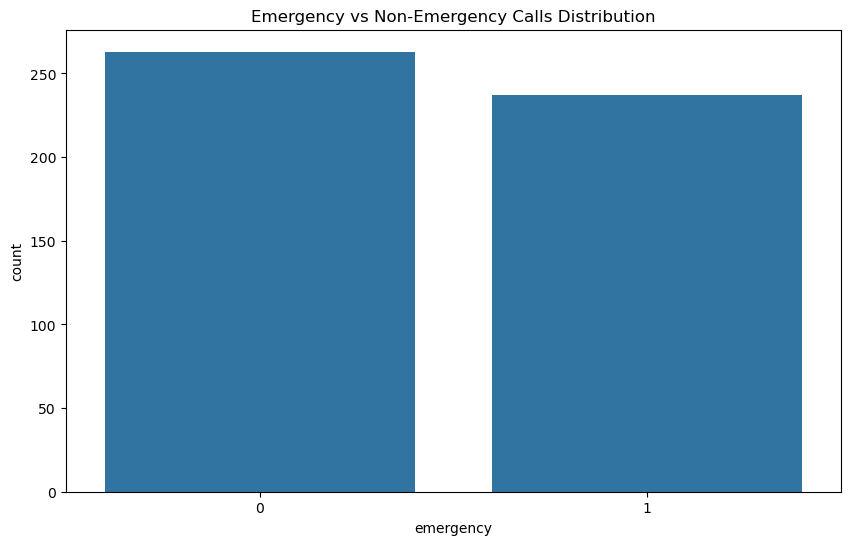

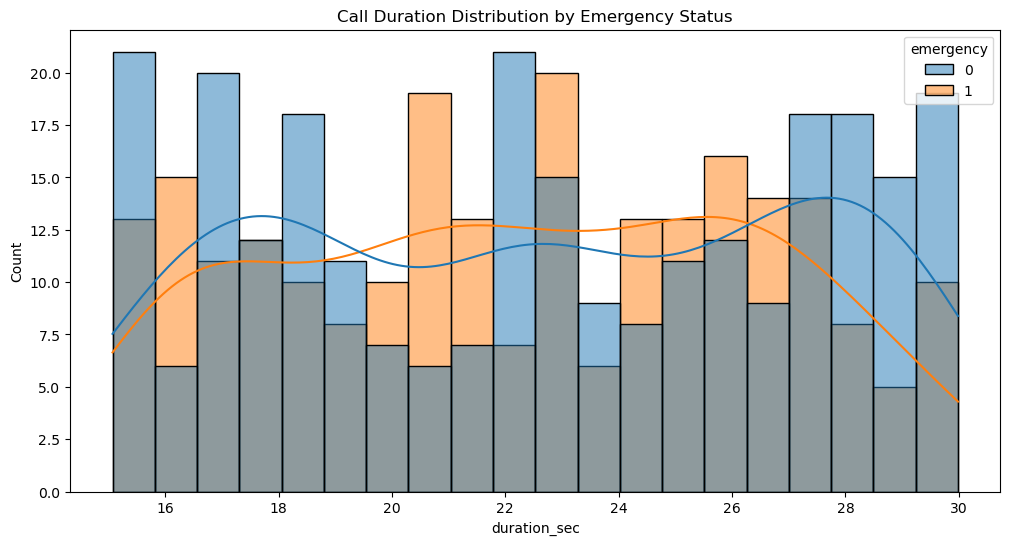

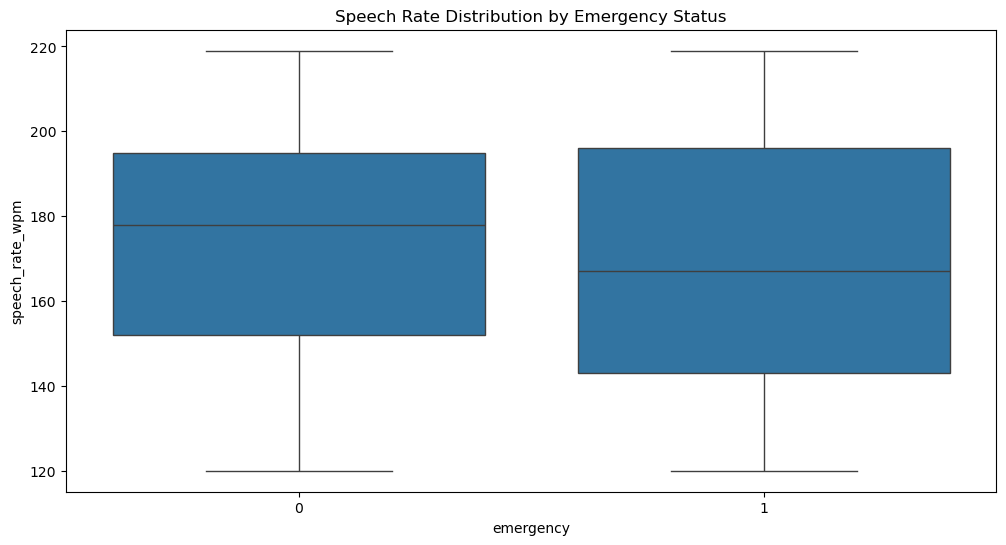

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.59      0.49      0.54        53
           1       0.52      0.62      0.56        47

    accuracy                           0.55       100
   macro avg       0.55      0.55      0.55       100
weighted avg       0.56      0.55      0.55       100

Accuracy: 0.55

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.51      0.51      0.51        53
           1       0.45      0.45      0.45        47

    accuracy                           0.48       100
   macro avg       0.48      0.48      0.48       100
weighted avg       0.48      0.48      0.48       100

Accuracy: 0.48


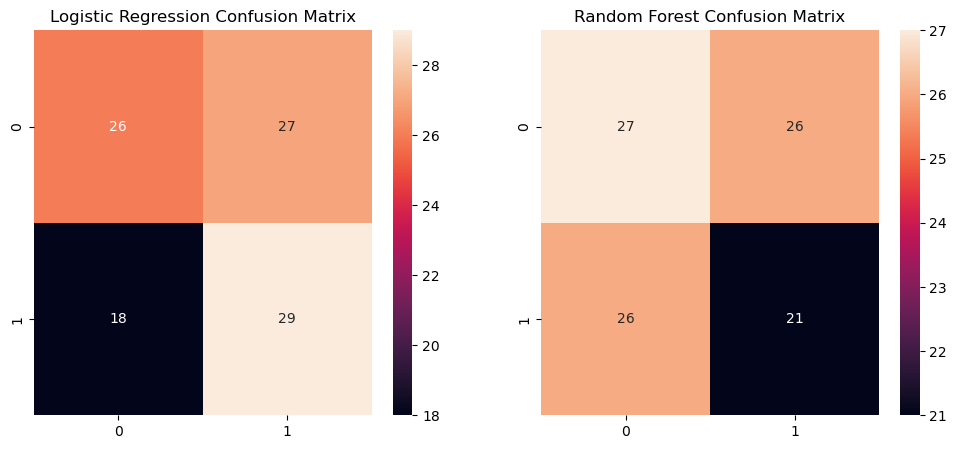

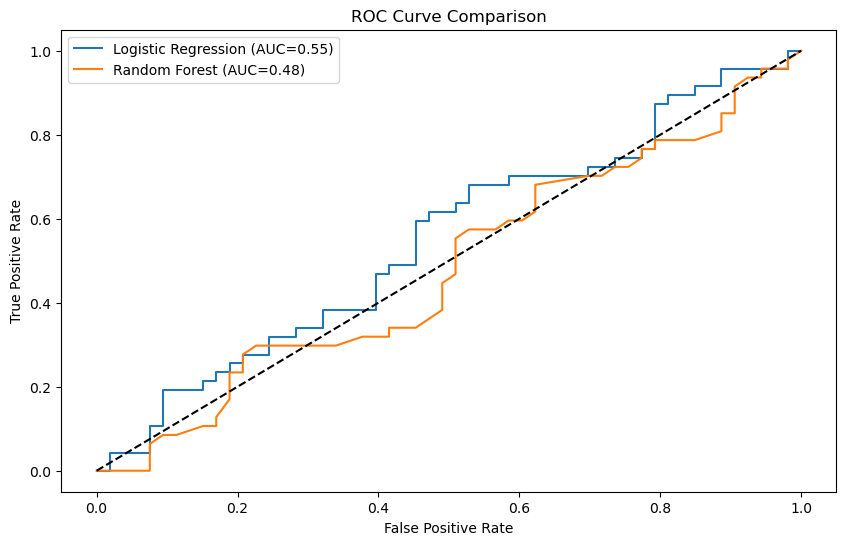

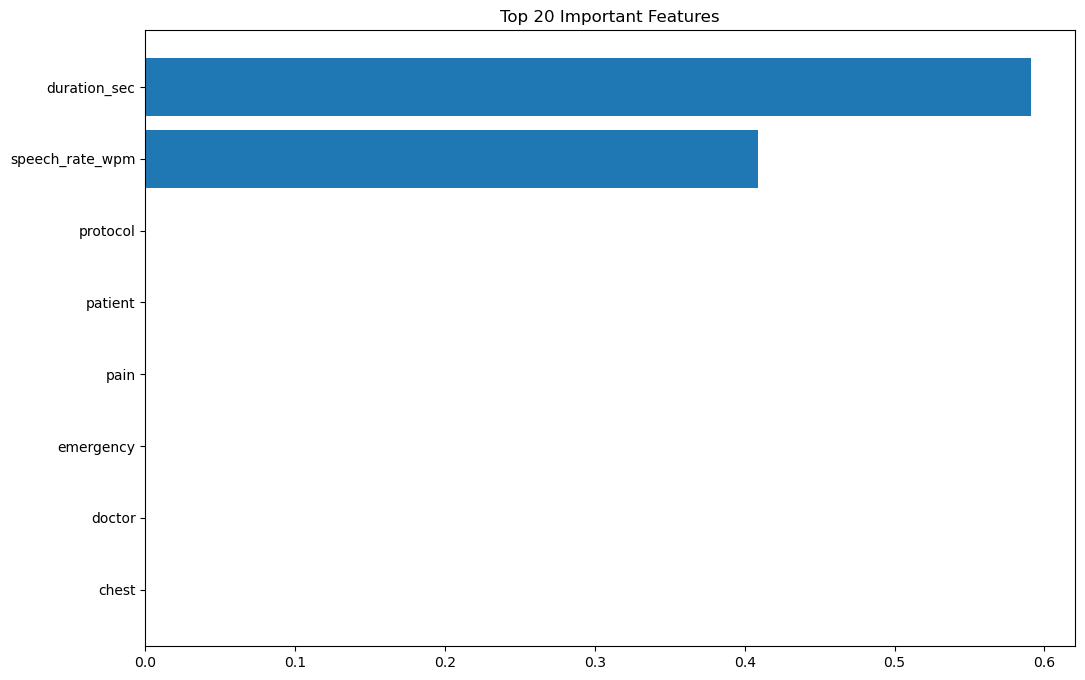

Model artifacts saved successfully!


In [5]:



# 1. Environment Setup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, 
                             confusion_matrix, 
                             accuracy_score,
                             roc_curve, 
                             roc_auc_score)
from sklearn.preprocessing import StandardScaler
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download required NLTK resources
nltk.download(['punkt', 'stopwords', 'punkt_tab', 'wordnet', 'omw-1.4'])


# 2. Data Loading & Preparation


data = {
    'call_id': [f'MED_{i:04d}' for i in range(500)],
    'transcript': ['Patient: Chest pain! Doctor: Emergency protocol!' for _ in range(500)],
    'duration_sec': np.random.uniform(15, 30, 500),
    'speech_rate_wpm': np.random.randint(120, 220, 500),
    'emergency': np.random.randint(0, 2, 500),
    'gender': np.random.choice(['Male', 'Female'], 500),
    'location': np.random.choice(['ER', 'ICU', 'Clinic'], 500)
}
df = pd.DataFrame(data)

# Basic info
print("Dataset Shape:", df.shape)
print("\nFirst 5 Entries:")
display(df.head())


# 3. Exploratory Data Analysis (EDA)

# Class distribution
plt.figure(figsize=(10,6))
sns.countplot(x='emergency', data=df)
plt.title('Emergency vs Non-Emergency Calls Distribution')
plt.show()

# Duration analysis
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='duration_sec', hue='emergency', bins=20, kde=True)
plt.title('Call Duration Distribution by Emergency Status')
plt.show()

# Speech rate analysis
plt.figure(figsize=(12,6))
sns.boxplot(x='emergency', y='speech_rate_wpm', data=df)
plt.title('Speech Rate Distribution by Emergency Status')
plt.show()


# 4. Text Preprocessing & Feature Engineering

def clean_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalnum()]
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

# Apply cleaning
df['cleaned_text'] = df['transcript'].apply(clean_text)

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=500)
text_features = tfidf.fit_transform(df['cleaned_text'])

# Create feature matrix
numerical_features = df[['duration_sec', 'speech_rate_wpm']]
scaler = StandardScaler()
numerical_features = scaler.fit_transform(numerical_features)

# Convert feature names to strings
feature_names = [str(i) for i in tfidf.get_feature_names_out()] + ['duration_sec', 'speech_rate_wpm']

# Create combined features
X = pd.DataFrame(
    np.hstack([text_features.toarray(), numerical_features]),
    columns=feature_names
)
y = df['emergency']


# 5. Predictive Modeling

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Logistic Regression
lr = LogisticRegression(class_weight='balanced', max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Random Forest
rf = RandomForestClassifier(class_weight='balanced', n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
# 6. Advanced Visualization
# Confusion Matrix
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Logistic Regression Confusion Matrix')

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d')
plt.title('Random Forest Confusion Matrix')
plt.show()

# ROC Curve
plt.figure(figsize=(10,6))
for model, name in [(lr, 'Logistic Regression'), (rf, 'Random Forest')]:
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC={auc:.2f})')
    
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

# Feature Importance
plt.figure(figsize=(12,8))
importances = rf.feature_importances_
sorted_idx = np.argsort(importances)[-20:]
plt.barh(range(len(sorted_idx)), importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx])
plt.title('Top 20 Important Features')
plt.show()

# 7. Model Interpretation & Deployment

# final model
import joblib
joblib.dump(rf, 'final_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')
joblib.dump(scaler, 'feature_scaler.pkl')

print("Model artifacts saved successfully!")

In [28]:
!pip install pandas numpy matplotlib seaborn nltk scikit-learn wordcloud

In [29]:
import nltk
nltk.download(['punkt', 'stopwords', 'punkt_tab'])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [37]:
import joblib
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

# Ensure NLTK resources are available
nltk.download('punkt')
nltk.download('stopwords')

# Load model and transformers
rf_model = joblib.load('final_model.pkl')
tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')
scaler = joblib.load('feature_scaler.pkl')

# Define dictionaries (expandable)
MEDICAL_KEYWORDS = [
    'pain', 'bleeding', 'fever', 'dizzy', 'unconscious', 'ecg', 'rash', 
    'headache', 'vomiting', 'shortness', 'breath', 'collapse', 'swelling',
    'emergency', 'urgent', 'immediately', 'injury', 'infection', 'allergy'
]

# Text preprocessing
def clean_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalnum()]
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens), tokens

# Prediction + keyword extraction
def predict_emergency_with_keywords(transcript, duration_sec, speech_rate_wpm):
    cleaned_text, tokens = clean_text(transcript)
    
    # Keyword detection
    matched_keywords = list(set(tokens).intersection(set(MEDICAL_KEYWORDS)))
    
    # Text vectorization
    text_vec = tfidf_vectorizer.transform([cleaned_text])
    
    # Numeric features
    numeric_features = scaler.transform([[duration_sec, speech_rate_wpm]])
    
    # Combine features
    final_features = np.hstack([text_vec.toarray(), numeric_features])
    
    # Predict
    prediction = rf_model.predict(final_features)[0]
    probability = rf_model.predict_proba(final_features)[0][1]
    
    return {
        'prediction': int(prediction),
        'probability_of_emergency': round(probability, 4),
        'matched_keywords': matched_keywords
    }

# 🔍 Example usage
sample_transcript = "Patient: I feel dizzy and shortness of breath. Doctor: Let's do an ECG now!"
sample_duration = 25.0
sample_speech_rate = 180

result = predict_emergency_with_keywords(sample_transcript, sample_duration, sample_speech_rate)
print("Prediction Result:", result)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Prediction Result: {'prediction': 1, 'probability_of_emergency': 0.8, 'matched_keywords': ['breath', 'shortness', 'dizzy', 'ecg']}


C:\Users\acer\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Train shape: (160, 14)
Test shape: (40, 14)
Complete dataset shape: (200, 14)

Duplicate rows in Complete Dataset: 0

Common IDs between train/test: 0

Missing values:
call_id            0
sender_id          0
receiver_id        0
audio_link         0
transcript         0
duration_sec       0
speech_rate_wpm    0
emergency          0
urgency_level      0
sentiment          0
keywords           0
gender             0
timezone           0
location           0
dtype: int64

Data types:
call_id             object
sender_id           object
receiver_id         object
audio_link          object
transcript          object
duration_sec       float64
speech_rate_wpm      int64
emergency            int64
urgency_level        int64
sentiment           object
keywords            object
gender              object
timezone            object
location            object
dtype: object

Basic stats:
       duration_sec  speech_rate_wpm   emergency  urgency_level
count    200.000000       200.000000  200.

C:\Users\acer\AppData\Local\Temp\ipykernel_251168\758640902.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='emergency', data=complete_df, palette=palette)
C:\Users\acer\AppData\Local\Temp\ipykernel_251168\758640902.py:46: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(x='emergency', data=complete_df, palette=palette)
C:\Users\acer\AppData\Local\Temp\ipykernel_251168\758640902.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='urgency_level', data=complete_df, palette=palette)
C:\Users\acer\AppData\Local\Temp\ipykernel_251168\758640902.py:51: UserWarning: The palette list has more values (10) than needed (3), w

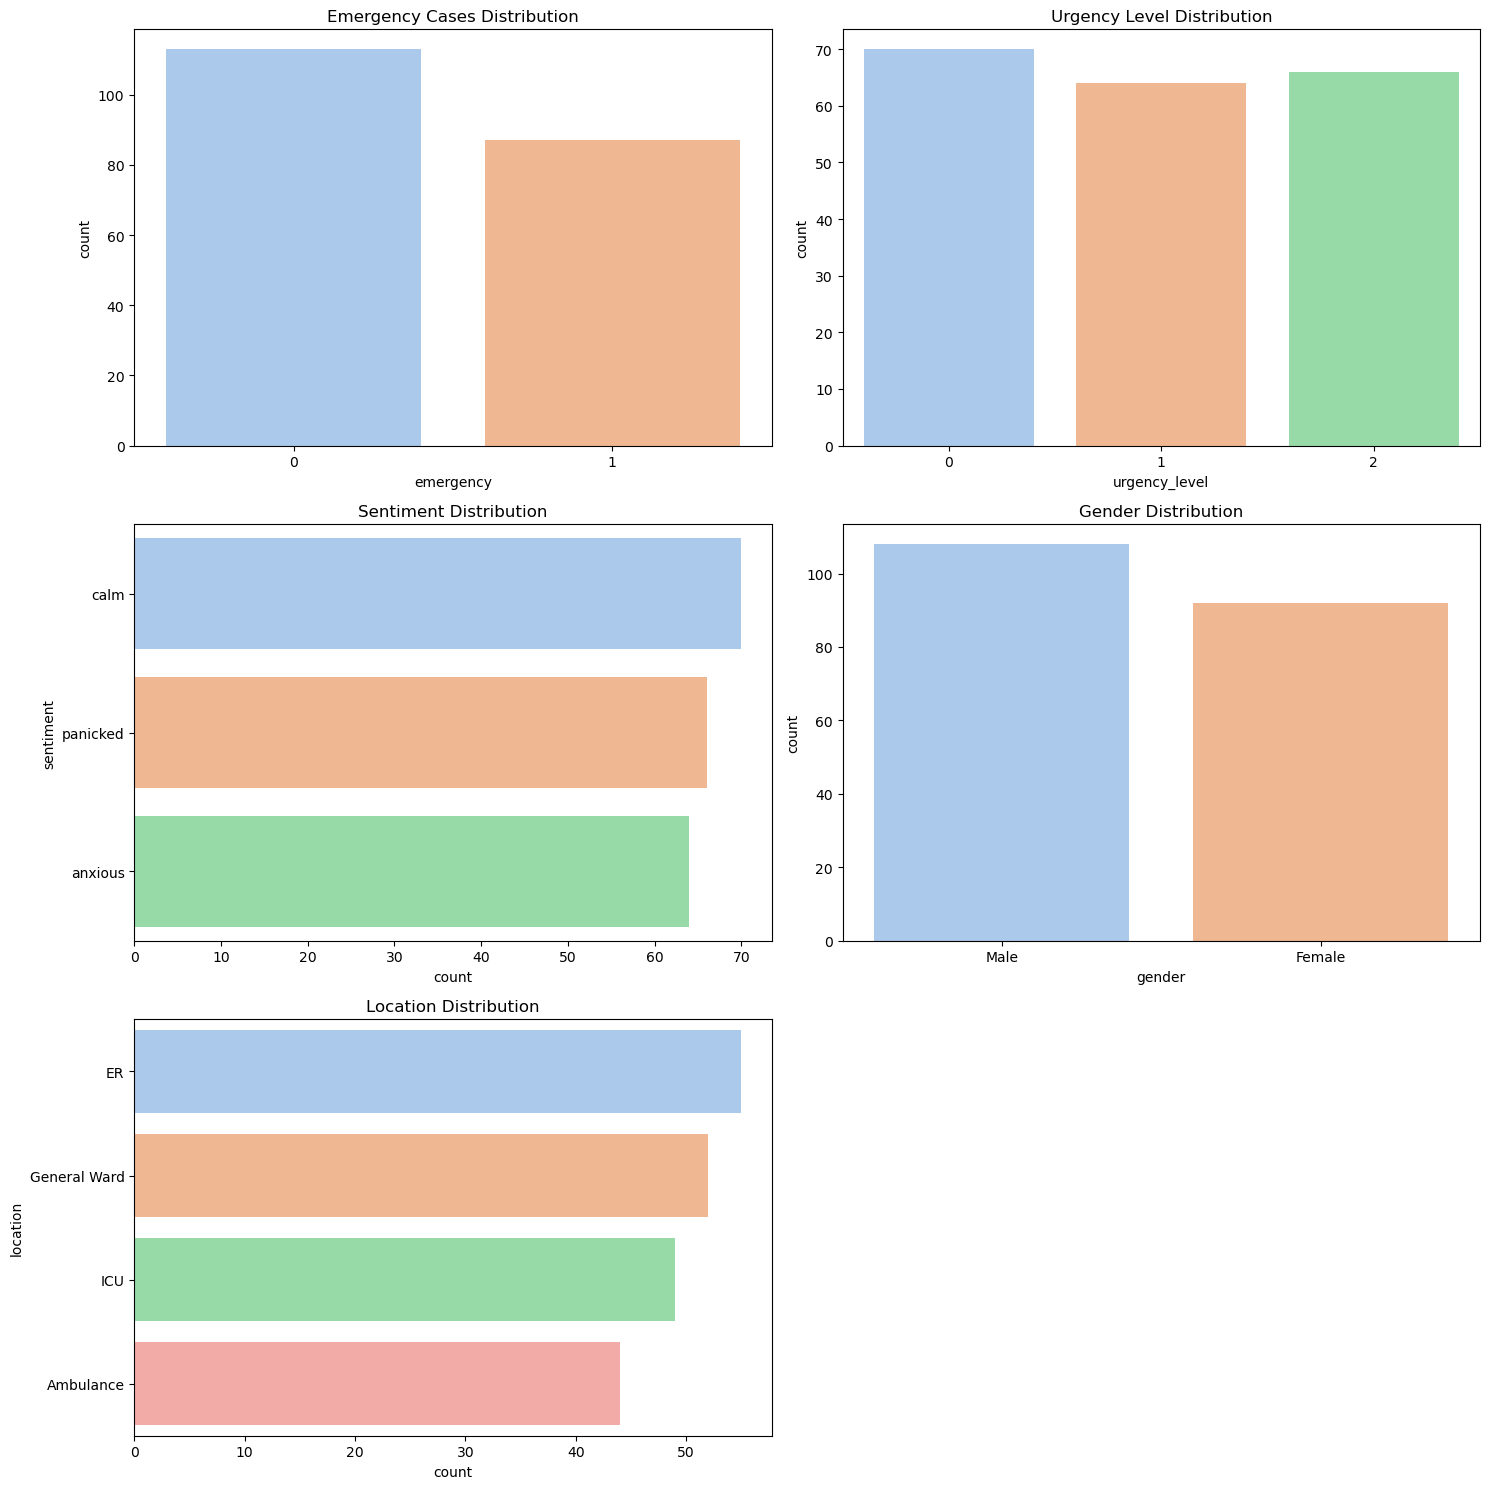

C:\Users\acer\AppData\Local\Temp\ipykernel_251168\758640902.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=symptoms.values, y=symptoms.index, palette=palette)
C:\Users\acer\AppData\Local\Temp\ipykernel_251168\758640902.py:81: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.barplot(x=symptoms.values, y=symptoms.index, palette=palette)


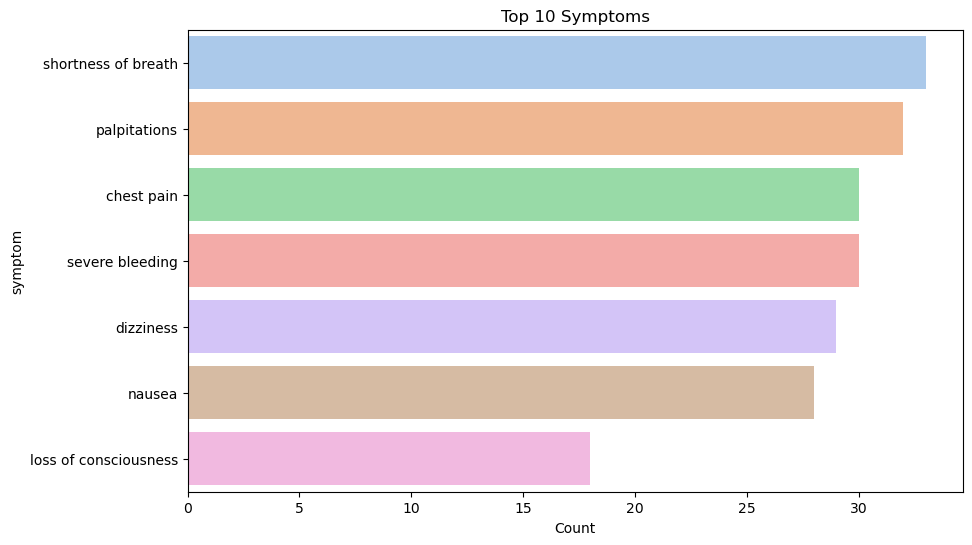

C:\Users\acer\AppData\Local\Temp\ipykernel_251168\758640902.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=actions.values, y=actions.index, palette=palette)
C:\Users\acer\AppData\Local\Temp\ipykernel_251168\758640902.py:89: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.barplot(x=actions.values, y=actions.index, palette=palette)


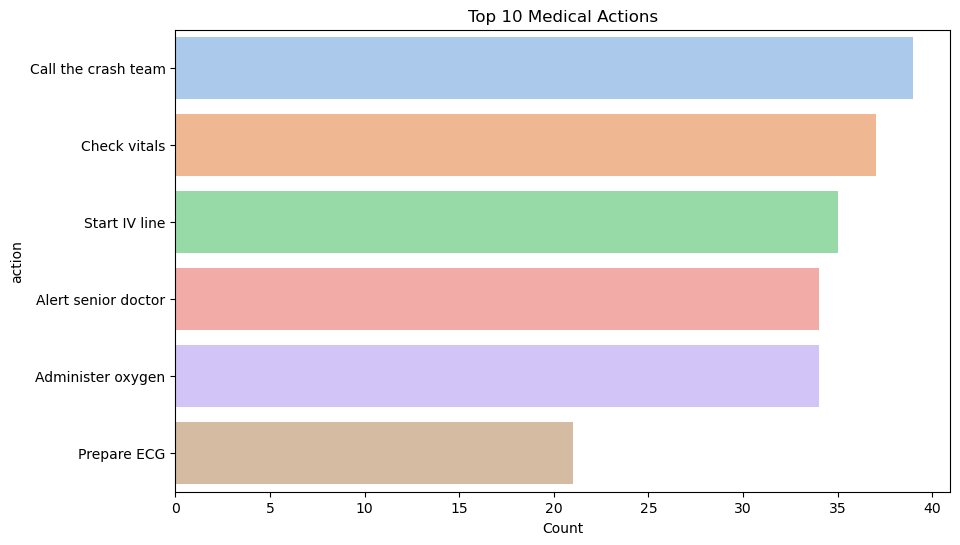

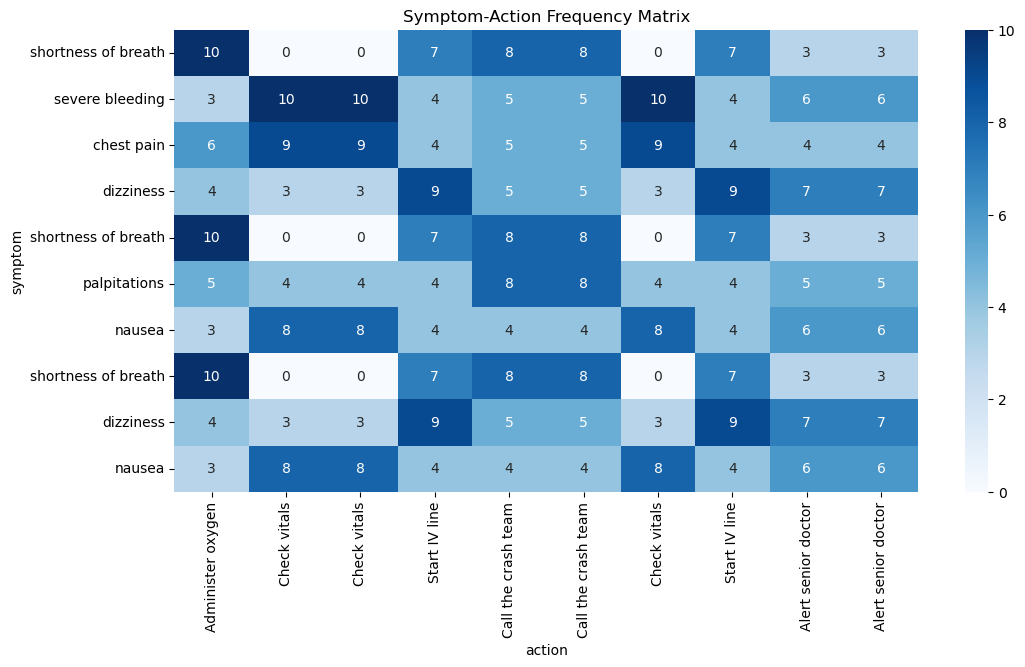

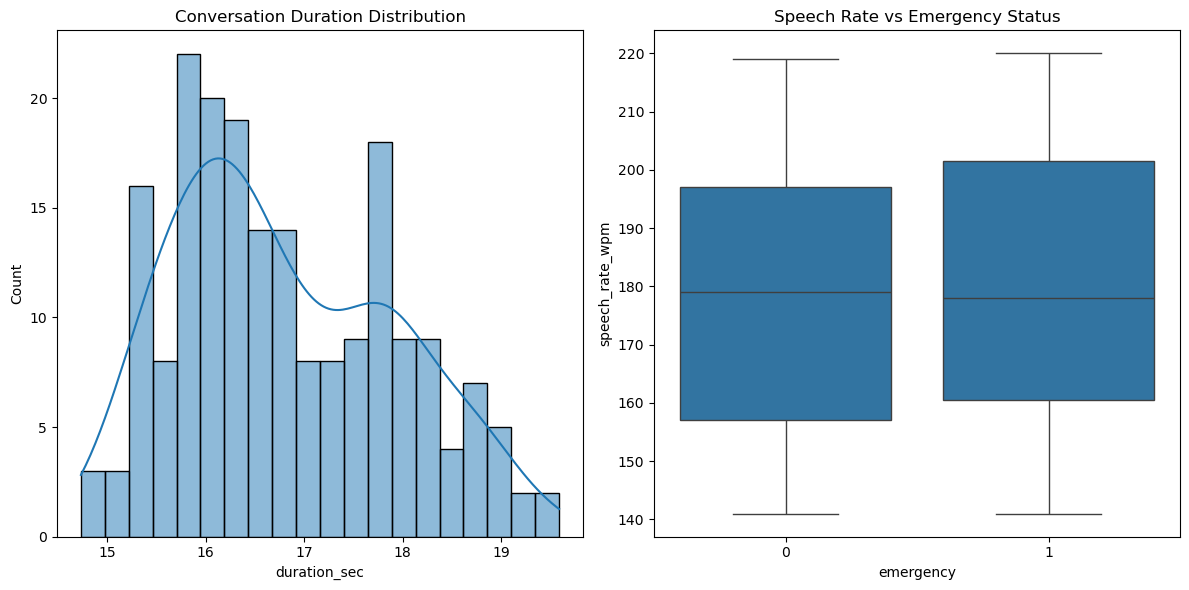

<Figure size 1000x600 with 0 Axes>

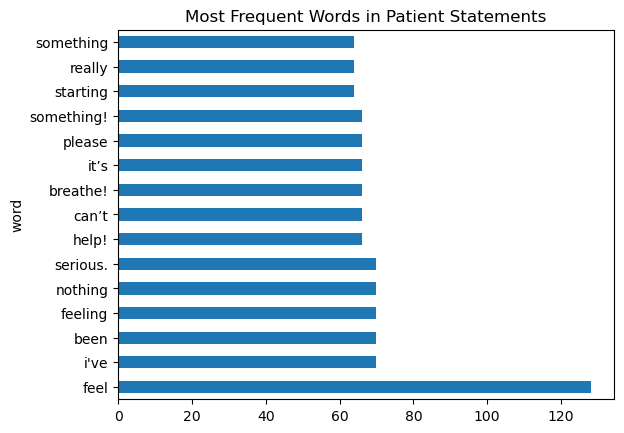

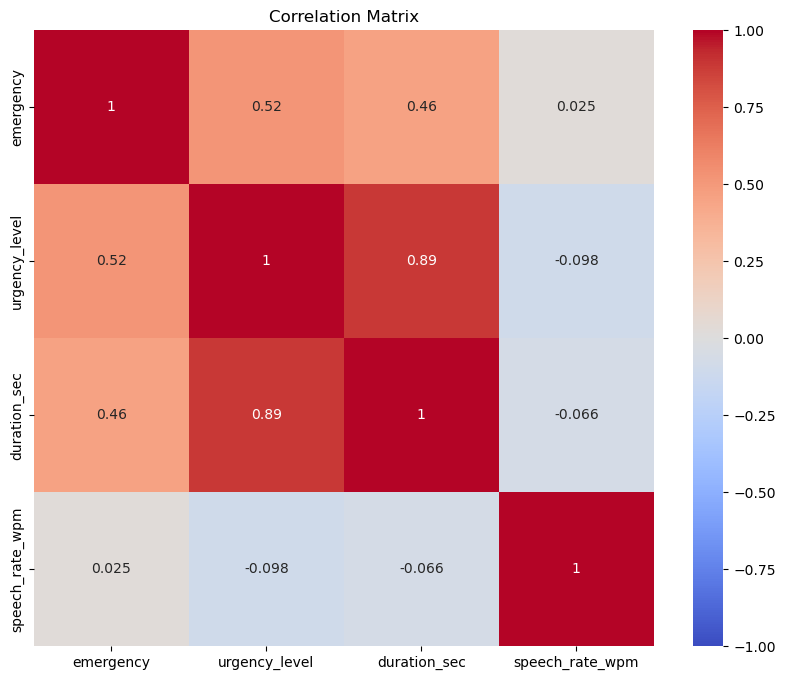

Sample Predicted Keywords:


AttributeError: 'list' object has no attribute 'shape'

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Load datasets
train_df = pd.read_csv('train_dataset.csv')
test_df = pd.read_csv('test_dataset.csv')
complete_df = pd.read_csv('complete_medical_dataset.csv')


# 1. Data Validation & Basic Checks

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
print("Complete dataset shape:", complete_df.shape)

#  duplicates
print("\nDuplicate rows in Complete Dataset:", complete_df.duplicated().sum())

#overlapping IDs between train/test
common_ids = set(train_df['call_id']).intersection(set(test_df['call_id']))
print(f"\nCommon IDs between train/test: {len(common_ids)}")


# 2. Basic Data Overview

print("\nMissing values:")
print(complete_df.isnull().sum())

print("\nData types:")
print(complete_df.dtypes)

print("\nBasic stats:")
print(complete_df.describe())


# 3. Distribution Analysis

plt.figure(figsize=(15, 15))
palette = sns.color_palette("pastel")

# Emergency Distribution
plt.subplot(3, 2, 1)
sns.countplot(x='emergency', data=complete_df, palette=palette)
plt.title('Emergency Cases Distribution')

# Urgency Level Distribution
plt.subplot(3, 2, 2)
sns.countplot(x='urgency_level', data=complete_df, palette=palette)
plt.title('Urgency Level Distribution')

# Sentiment Analysis
plt.subplot(3, 2, 3)
sns.countplot(y='sentiment', data=complete_df, palette=palette, order=complete_df['sentiment'].value_counts().index)
plt.title('Sentiment Distribution')

# Gender Distribution
plt.subplot(3, 2, 4)
sns.countplot(x='gender', data=complete_df, palette=palette)
plt.title('Gender Distribution')

# Location Distribution
plt.subplot(3, 2, 5)
sns.countplot(y='location', data=complete_df, palette=palette, order=complete_df['location'].value_counts().index)
plt.title('Location Distribution')

plt.tight_layout()
plt.show()


# 4. Keyword Analysis

# Splitting keywords into symptoms and actions
complete_df[['symptom', 'action']] = complete_df['keywords'].str.split(', ', n=1, expand=True)

# Top Symptoms
symptoms = complete_df['symptom'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=symptoms.values, y=symptoms.index, palette=palette)
plt.title('Top 10 Symptoms')
plt.xlabel('Count')
plt.show()

# Top Actions
actions = complete_df['action'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=actions.values, y=actions.index, palette=palette)
plt.title('Top 10 Medical Actions')
plt.xlabel('Count')
plt.show()

# Symptom-Action Matrix (Top 10 combinations)
top_combinations = complete_df.groupby(['symptom', 'action']).size().reset_index(name='count').sort_values('count', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.heatmap(pd.crosstab(complete_df['symptom'], complete_df['action']).loc[top_combinations['symptom'], top_combinations['action']], 
            annot=True, fmt='d', cmap='Blues')
plt.title('Symptom-Action Frequency Matrix')
plt.show()


# 5. Temporal & Speech Analysis

plt.figure(figsize=(12, 6))

# Duration Distribution
plt.subplot(1, 2, 1)
sns.histplot(complete_df['duration_sec'], bins=20, kde=True)
plt.title('Conversation Duration Distribution')

# Speech Rate Analysis
plt.subplot(1, 2, 2)
sns.boxplot(x='emergency', y='speech_rate_wpm', data=complete_df)
plt.title('Speech Rate vs Emergency Status')

plt.tight_layout()
plt.show()


# 6. Advanced Text Analysis

# Extracting patient statements
complete_df['patient_text'] = complete_df['transcript'].apply(lambda x: x.split('\n')[0].split(': ')[1])

# Word frequency analysis
all_words = ' '.join(complete_df['patient_text']).lower().split()
word_freq = Counter([word for word in all_words if len(word) > 3])  # Exclude short words

plt.figure(figsize=(10, 6))
pd.DataFrame(word_freq.most_common(15), columns=['word', 'count']).set_index('word').plot(kind='barh', legend=False)
plt.title('Most Frequent Words in Patient Statements')
plt.show()


# 7. Correlation Analysis

# Converting categorical variables to numerical
corr_df = complete_df.copy()
corr_df['emergency'] = corr_df['emergency'].astype(int)
corr_df['urgency_level'] = corr_df['urgency_level'].astype(int)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_df[['emergency', 'urgency_level', 'duration_sec', 'speech_rate_wpm']].corr(), 
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.naive_bayes import MultinomialNB

# Step 1: Extract keywords into symptoms and actions
complete_df['symptom'] = complete_df['keywords'].apply(lambda x: x.split(', ')[0] if pd.notnull(x) else '')
complete_df['action'] = complete_df['keywords'].apply(lambda x: x.split(', ')[1] if pd.notnull(x) and ', ' in x else '')

# Step 2: Clean transcript for keyword prediction
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def clean_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [t for t in tokens if t.isalnum() and t not in stopwords.words('english')]
    return ' '.join(tokens)

complete_df['clean_transcript'] = complete_df['transcript'].apply(clean_text)

# Step 3: TF-IDF for text features
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer(max_features=1000)
X_text = tfidf_vec.fit_transform(complete_df['clean_transcript'])

# Step 4: Target variable encoding (multi-label for symptom & action)
mlb = MultiLabelBinarizer()
Y_keywords = mlb.fit_transform(complete_df[['symptom', 'action']].values.tolist())

# Step 5: Train/test split
X_train_kw, X_test_kw, y_train_kw, y_test_kw = train_test_split(X_text, Y_keywords, test_size=0.2, random_state=42)

# Step 6: Model training (e.g. MultinomialNB)
multi_label_model = MultiOutputClassifier(MultinomialNB())
multi_label_model.fit(X_train_kw, y_train_kw)

# Step 7: Prediction and evaluation
y_pred_kw = multi_label_model.predict(X_test_kw)

# Evaluate with example labels
print("Sample Predicted Keywords:")
for i in range(5):
    pred_labels = mlb.inverse_transform([y_pred_kw[i]])[0]
    print(f"Transcript {i+1}: Predicted -> {pred_labels}")



In [35]:
pip install gradio

  Using cached fastapi-0.115.12-py3-none-any.whl.metadata (27 kB)
  Using cached starlette-0.46.2-py3-none-any.whl.metadata (6.2 kB)
  Using cached uvicorn-0.34.2-py3-none-any.whl.metadata (6.5 kB)
   ---------------------------------------- 0.0/54.1 MB ? eta -:--:--
   ---------------------------------------- 0.3/54.1 MB ? eta -:--:--
    --------------------------------------- 0.8/54.1 MB 1.8 MB/s eta 0:00:31
    --------------------------------------- 1.3/54.1 MB 2.3 MB/s eta 0:00:23
   - -------------------------------------- 1.8/54.1 MB 2.4 MB/s eta 0:00:22
   - -------------------------------------- 2.4/54.1 MB 2.5 MB/s eta 0:00:21
   -- ------------------------------------- 3.1/54.1 MB 2.6 MB/s eta 0:00:20
   -- ------------------------------------- 3.7/54.1 MB 2.6 MB/s eta 0:00:20
   --- ------------------------------------ 4.2/54.1 MB 2.7 MB/s eta 0:00:19
   --- ------------------------------------ 5.0/54.1 MB 2.7 MB/s eta 0:00:19
   ---- ----------------------------------- 5.

In [38]:
pip install SpeechRecognition pydub gradio

   ---------------------------------------- 0.0/32.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/32.9 MB ? eta -:--:--
    --------------------------------------- 0.8/32.9 MB 2.8 MB/s eta 0:00:12
   - -------------------------------------- 1.3/32.9 MB 2.7 MB/s eta 0:00:12
   -- ------------------------------------- 1.8/32.9 MB 2.6 MB/s eta 0:00:13
   -- ------------------------------------- 2.1/32.9 MB 2.3 MB/s eta 0:00:14
   --- ------------------------------------ 2.6/32.9 MB 2.4 MB/s eta 0:00:13
   ---- ----------------------------------- 3.4/32.9 MB 2.5 MB/s eta 0:00:12
   ---- ----------------------------------- 3.9/32.9 MB 2.4 MB/s eta 0:00:12
   ----- ---------------------------------- 4.5/32.9 MB 2.5 MB/s eta 0:00:12
   ------ --------------------------------- 5.0/32.9 MB 2.5 MB/s eta 0:00:12
   ------ --------------------------------- 5.5/32.9 MB 2.5 MB/s eta 0:00:11
   ------- -------------------------------- 6.0/32.9 MB 2.5 MB/s eta 0:00:11
   -------- -

In [5]:
pip install soundfile gradio soundfile SpeechRecognition scikit-learn pandas joblib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import joblib
import gradio as gr
import numpy as np
import pandas as pd
import soundfile as sf
import speech_recognition as sr
from pydub import AudioSegment
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# 1. Prepare Dataset
def load_data():
    data = {
        "transcript": [
            "There is heavy bleeding and chest pain",
            "Patient is calm and stable",
            "He's unconscious and not breathing",
            "Minor injury, nothing to worry",
        ],
        "emergency": [1, 0, 1, 0],
        "sentiment": ["panicked", "calm", "anxious", "calm"]
    }
    return pd.DataFrame(data)

# 2. Train Model
def train_model():
    df = load_data()
    df['clean_text'] = df['transcript'].apply(lambda x: x.lower())

    le_sentiment = LabelEncoder()
    df['sentiment_encoded'] = le_sentiment.fit_transform(df['sentiment'])

    X_train, _, y_train, _ = train_test_split(
        df['clean_text'],
        df[['emergency', 'sentiment_encoded']],
        test_size=0.2,
        random_state=42
    )

    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=1000, ngram_range=(1, 2))),
        ('clf', MultiOutputClassifier(RandomForestClassifier(n_estimators=100)))
    ])

    pipeline.fit(X_train, y_train)

    joblib.dump(pipeline, 'medical_model.pkl')
    joblib.dump(le_sentiment, 'sentiment_encoder.pkl')
    print(" Model and encoder saved.")

# 3. Prediction System
class MedicalPredictor:
    def __init__(self):
        if not os.path.exists('medical_model.pkl') or not os.path.exists('sentiment_encoder.pkl'):
            train_model()

        self.model = joblib.load('medical_model.pkl')
        self.encoder = joblib.load('sentiment_encoder.pkl')
        self.recognizer = sr.Recognizer()

    def handle_audio_input(self, audio_input):
        """Handle both file upload and microphone recording"""
        if isinstance(audio_input, tuple):
            sample_rate, audio_data = audio_input
            temp_path = "temp_audio.wav"
            sf.write(temp_path, audio_data, sample_rate)
            return temp_path
        return audio_input  # File path

    def transcribe(self, audio_input):
        audio_path = self.handle_audio_input(audio_input)
        
        try:
            # Convert to proper format
            sound = AudioSegment.from_file(audio_path)
            standard_path = "converted.wav"
            sound.export(standard_path, format="wav")
        except Exception as e:
            return f"Error converting audio: {e}"

        try:
            with sr.AudioFile(standard_path) as source:
                audio = self.recognizer.record(source)
                return self.recognizer.recognize_google(audio)
        except sr.UnknownValueError:
            return "Could not understand audio"
        except sr.RequestError as e:
            return f"Google API error: {e}"
        finally:
            for f in [audio_path, "converted.wav"]:
                if os.path.exists(f):
                    os.remove(f)

    def predict(self, text):
        try:
            pred = self.model.predict([text])
            emergency = int(pred[0][0])
            sentiment = self.encoder.inverse_transform([int(pred[0][1])])[0]
            return {
                "emergency": "Yes" if emergency == 1 else "No",
                "sentiment": sentiment
            }
        except Exception as e:
            return {"emergency": "Error", "sentiment": str(e)}

# 4. Gradio Interface
class PredictionInterface:
    def __init__(self):
        self.predictor = MedicalPredictor()

    def process_audio(self, audio_input):
        transcript = self.predictor.transcribe(audio_input)
        if "error" in transcript.lower() or "could not" in transcript.lower():
            return "Error", "Transcription Failed", transcript

        result = self.predictor.predict(transcript)
        return result['emergency'], result['sentiment'], transcript

    def launch(self):
        gr.Interface(
            fn=self.process_audio,
            inputs=gr.Audio(label="🎙 Record or Upload Audio", type="filepath"),
            outputs=[
                gr.Label(label="🚨 Emergency Detected"),
                gr.Label(label="🧠 Sentiment"),
                gr.Textbox(label="📝 Transcript")
            ],
            title="🩺 Medical Emergency Detector",
            description="Detect emergency and sentiment from microphone recording or phone call file.",
            allow_flagging="never"
        ).launch()

# 5. Run
if __name__ == "__main__":
    PredictionInterface().launch()


C:\Users\acer\anaconda3\Lib\site-packages\gradio\interface.py:415: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated.Use `flagging_mode` instead.
  warnings.warn(


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


ERROR:    Exception in ASGI application
Traceback (most recent call last):
  File "C:\Users\acer\anaconda3\Lib\site-packages\uvicorn\protocols\http\h11_impl.py", line 403, in run_asgi
    result = await app(  # type: ignore[func-returns-value]
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\acer\anaconda3\Lib\site-packages\uvicorn\middleware\proxy_headers.py", line 60, in __call__
    return await self.app(scope, receive, send)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\acer\anaconda3\Lib\site-packages\fastapi\applications.py", line 1054, in __call__
    await super().__call__(scope, receive, send)
  File "C:\Users\acer\anaconda3\Lib\site-packages\starlette\applications.py", line 112, in __call__
    await self.middleware_stack(scope, receive, send)
  File "C:\Users\acer\anaconda3\Lib\site-packages\starlette\middleware\errors.py", line 187, in __call__
    raise exc
  File "C:\Users\acer\anaconda3\Lib\site-packages\starlette\middleware

In [5]:
import os
import socket
import joblib
import gradio as gr
import numpy as np
import pandas as pd
import soundfile as sf
import speech_recognition as sr
from pydub import AudioSegment
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Predefined keywords for detection
SYMPTOMS = ['bleeding', 'chest pain', 'unconscious', 'dizzy', 'burn', 'fracture', 'vomiting']
ACTIONS = ['cpr', 'intubation', 'monitoring', 'oxygen', 'defibrillation', 'immobilize', 'antibiotics']


# Step 1: Load mock dataset
def load_data():
    data = {
        "transcript": [
            "There is heavy bleeding and chest pain",
            "Patient is calm and stable",
            "He's unconscious and not breathing",
            "Minor injury, nothing to worry",
        ],
        "emergency": [1, 0, 1, 0],
        "sentiment": ["panicked", "calm", "anxious", "calm"]
    }
    return pd.DataFrame(data)


# Step 2: Train model
def train_model():
    df = load_data()
    df['clean_text'] = df['transcript'].apply(lambda x: x.lower())

    le_sentiment = LabelEncoder()
    df['sentiment_encoded'] = le_sentiment.fit_transform(df['sentiment'])

    X_train, _, y_train, _ = train_test_split(
        df['clean_text'],
        df[['emergency', 'sentiment_encoded']],
        test_size=0.2,
        random_state=42
    )

    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=1000, ngram_range=(1, 2))),
        ('clf', MultiOutputClassifier(RandomForestClassifier(n_estimators=100)))
    ])

    pipeline.fit(X_train, y_train)

    joblib.dump(pipeline, 'medical_model.pkl')
    joblib.dump(le_sentiment, 'sentiment_encoder.pkl')
    print("✅ Model and encoder saved.")


# Step 3: Medical Predictor
class MedicalPredictor:
    def __init__(self):
        if not os.path.exists('medical_model.pkl') or not os.path.exists('sentiment_encoder.pkl'):
            train_model()

        self.model = joblib.load('medical_model.pkl')
        self.encoder = joblib.load('sentiment_encoder.pkl')
        self.recognizer = sr.Recognizer()

    def handle_audio_input(self, audio_input):
        if isinstance(audio_input, tuple):
            sample_rate, audio_data = audio_input
            temp_path = "temp_audio.wav"
            sf.write(temp_path, audio_data, sample_rate)
            return temp_path
        return audio_input

    def transcribe(self, audio_input):
        audio_path = self.handle_audio_input(audio_input)
        try:
            sound = AudioSegment.from_file(audio_path)
            standard_path = "converted.wav"
            sound.export(standard_path, format="wav")
        except Exception as e:
            return f"Error converting audio: {e}"

        try:
            with sr.AudioFile(standard_path) as source:
                audio = self.recognizer.record(source)
                return self.recognizer.recognize_google(audio)
        except sr.UnknownValueError:
            return "Could not understand audio"
        except sr.RequestError as e:
            return f"Google API error: {e}"
        finally:
            for f in [audio_path, "converted.wav"]:
                if os.path.exists(f):
                    os.remove(f)

    def predict(self, text):
        try:
            pred = self.model.predict([text])
            emergency = int(pred[0][0])
            sentiment = self.encoder.inverse_transform([int(pred[0][1])])[0]
            keywords = self.extract_keywords(text)
            return {
                "emergency": "Yes" if emergency == 1 else "No",
                "sentiment": sentiment,
                "keywords": keywords
            }
        except Exception as e:
            return {"emergency": "Error", "sentiment": str(e), "keywords": []}

    def extract_keywords(self, text):
        text = text.lower()
        found_symptoms = [word for word in SYMPTOMS if word in text]
        found_actions = [word for word in ACTIONS if word in text]
        return {
            "symptoms": found_symptoms if found_symptoms else ["None detected"],
            "actions": found_actions if found_actions else ["None detected"]
        }


# ======================= CSS Styling =======================
PRIMARY_COLOR = "#605bff"
BACKGROUND_COLOR = "#f8f9fa"

custom_css = """
.gradio-container {
    background: #f8f9fa !important;
    font-family: -apple-system, BlinkMacSystemFont, sans-serif;
    max-width: 800px !important;
    margin: 1rem auto !important;
}

h1#main-header {
    color: #605bff !important;
    border-bottom: 3px solid #605bff !important;
    padding-bottom: 0.5rem !important;
    text-align: center !important;
}

.upload-section {
    background: white;
    border-radius: 12px;
    padding: 0.5rem;
    box-shadow: 0 4px 6px -1px rgba(0,0,0,0.1);
}

button.primary {
    background: #605bff;
    color: white;
    border: none;
    padding: 12px 32px;
    border-radius: 8px;
    transition: transform 0.2s;
}

button.primary:hover {
    transform: translateY(-1px);
    background: #504bdf;
}

.results-section {
    background: white;
    border-radius: 12px;
    padding: 1rem;
    margin-top: 2rem;
}

.result-item {
    background: #f8f9fa;
    border-radius: 8px;
    padding: 1rem;
    margin-bottom: 0.5rem;
}
"""


# Step 4: Gradio Interface
def create_interface():
    predictor = MedicalPredictor()

    def process_audio(audio_path):
        transcript = predictor.transcribe(audio_path)
        if "error" in transcript.lower() or "could not" in transcript.lower():
            return transcript, "❌ Error", "Transcription Failed", "N/A", "Try again"

        result = predictor.predict(transcript)
        emergency = "🔴 EMERGENCY" if result['emergency'] == "Yes" else "🟢 Normal"
        sentiment = result['sentiment'].capitalize()
        keywords = ", ".join(result["keywords"]["symptoms"] + result["keywords"]["actions"])

        recommendations = (
            "1. Call emergency services\n2. Administer first aid"
            if "emergency" in emergency else "No urgent action needed"
        )

        return transcript, emergency, sentiment, keywords, recommendations

    with gr.Blocks(css=custom_css, title="Medical Detector") as demo:
        gr.Markdown("""<h1 id="main-header">🩺 Medical Emergency Detection System</h1>""")

        with gr.Column(elem_classes="upload-section"):
            audio_input = gr.Audio(
                label="Patient Audio Input",
                sources=["microphone", "upload"],
                type="filepath",
                elem_id="audio-input"
            )
            with gr.Row():
                submit_btn = gr.Button("Analyze", elem_classes="primary")
                clear_btn = gr.Button("Clear", elem_classes="primary")

        with gr.Column(elem_classes="results-section"):
            with gr.Column(elem_classes="result-item"):
                transcript = gr.Textbox(label="Transcript", interactive=False)

            with gr.Row():
                with gr.Column(elem_classes="result-item"):
                    status = gr.Label(label="Emergency Status")
                with gr.Column(elem_classes="result-item"):
                    sentiment = gr.Label(label="Sentiment Analysis")

            with gr.Column(elem_classes="result-item"):
                keywords = gr.Textbox(label="Detected Keywords", interactive=False)

            with gr.Column(elem_classes="result-item"):
                recommendations = gr.Textbox(label="Recommended Actions", interactive=False)

        submit_btn.click(
            process_audio,
            inputs=audio_input,
            outputs=[transcript, status, sentiment, keywords, recommendations]
        )
        clear_btn.click(
            lambda: [None, "", "", "", ""],
            outputs=[audio_input, transcript, status, sentiment, keywords, recommendations]
        )

    return demo


# Utility function
def get_available_port():
    sock = socket.socket()
    sock.bind(('', 0))
    port = sock.getsockname()[1]
    sock.close()
    return port


# Final launcher
if __name__ == "__main__":
    port = get_available_port()
    print(f"🌐 Attempting to launch on port {port}")
    try:
        demo = create_interface()
        demo.launch(
            server_name="0.0.0.0",
            server_port=port,
            inbrowser=True,
            show_error=True
        )
    except Exception as e:
        print(f"⚠️ Local launch failed: {str(e)}")
        print("🔗 Attempting public URL...")
        demo.launch(share=True)


🌐 Attempting to launch on port 64751
* Running on local URL:  http://0.0.0.0:64751
* To create a public link, set `share=True` in `launch()`.
